In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qs_mps.utils import binders_cumul
from scipy.optimize import curve_fit
# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

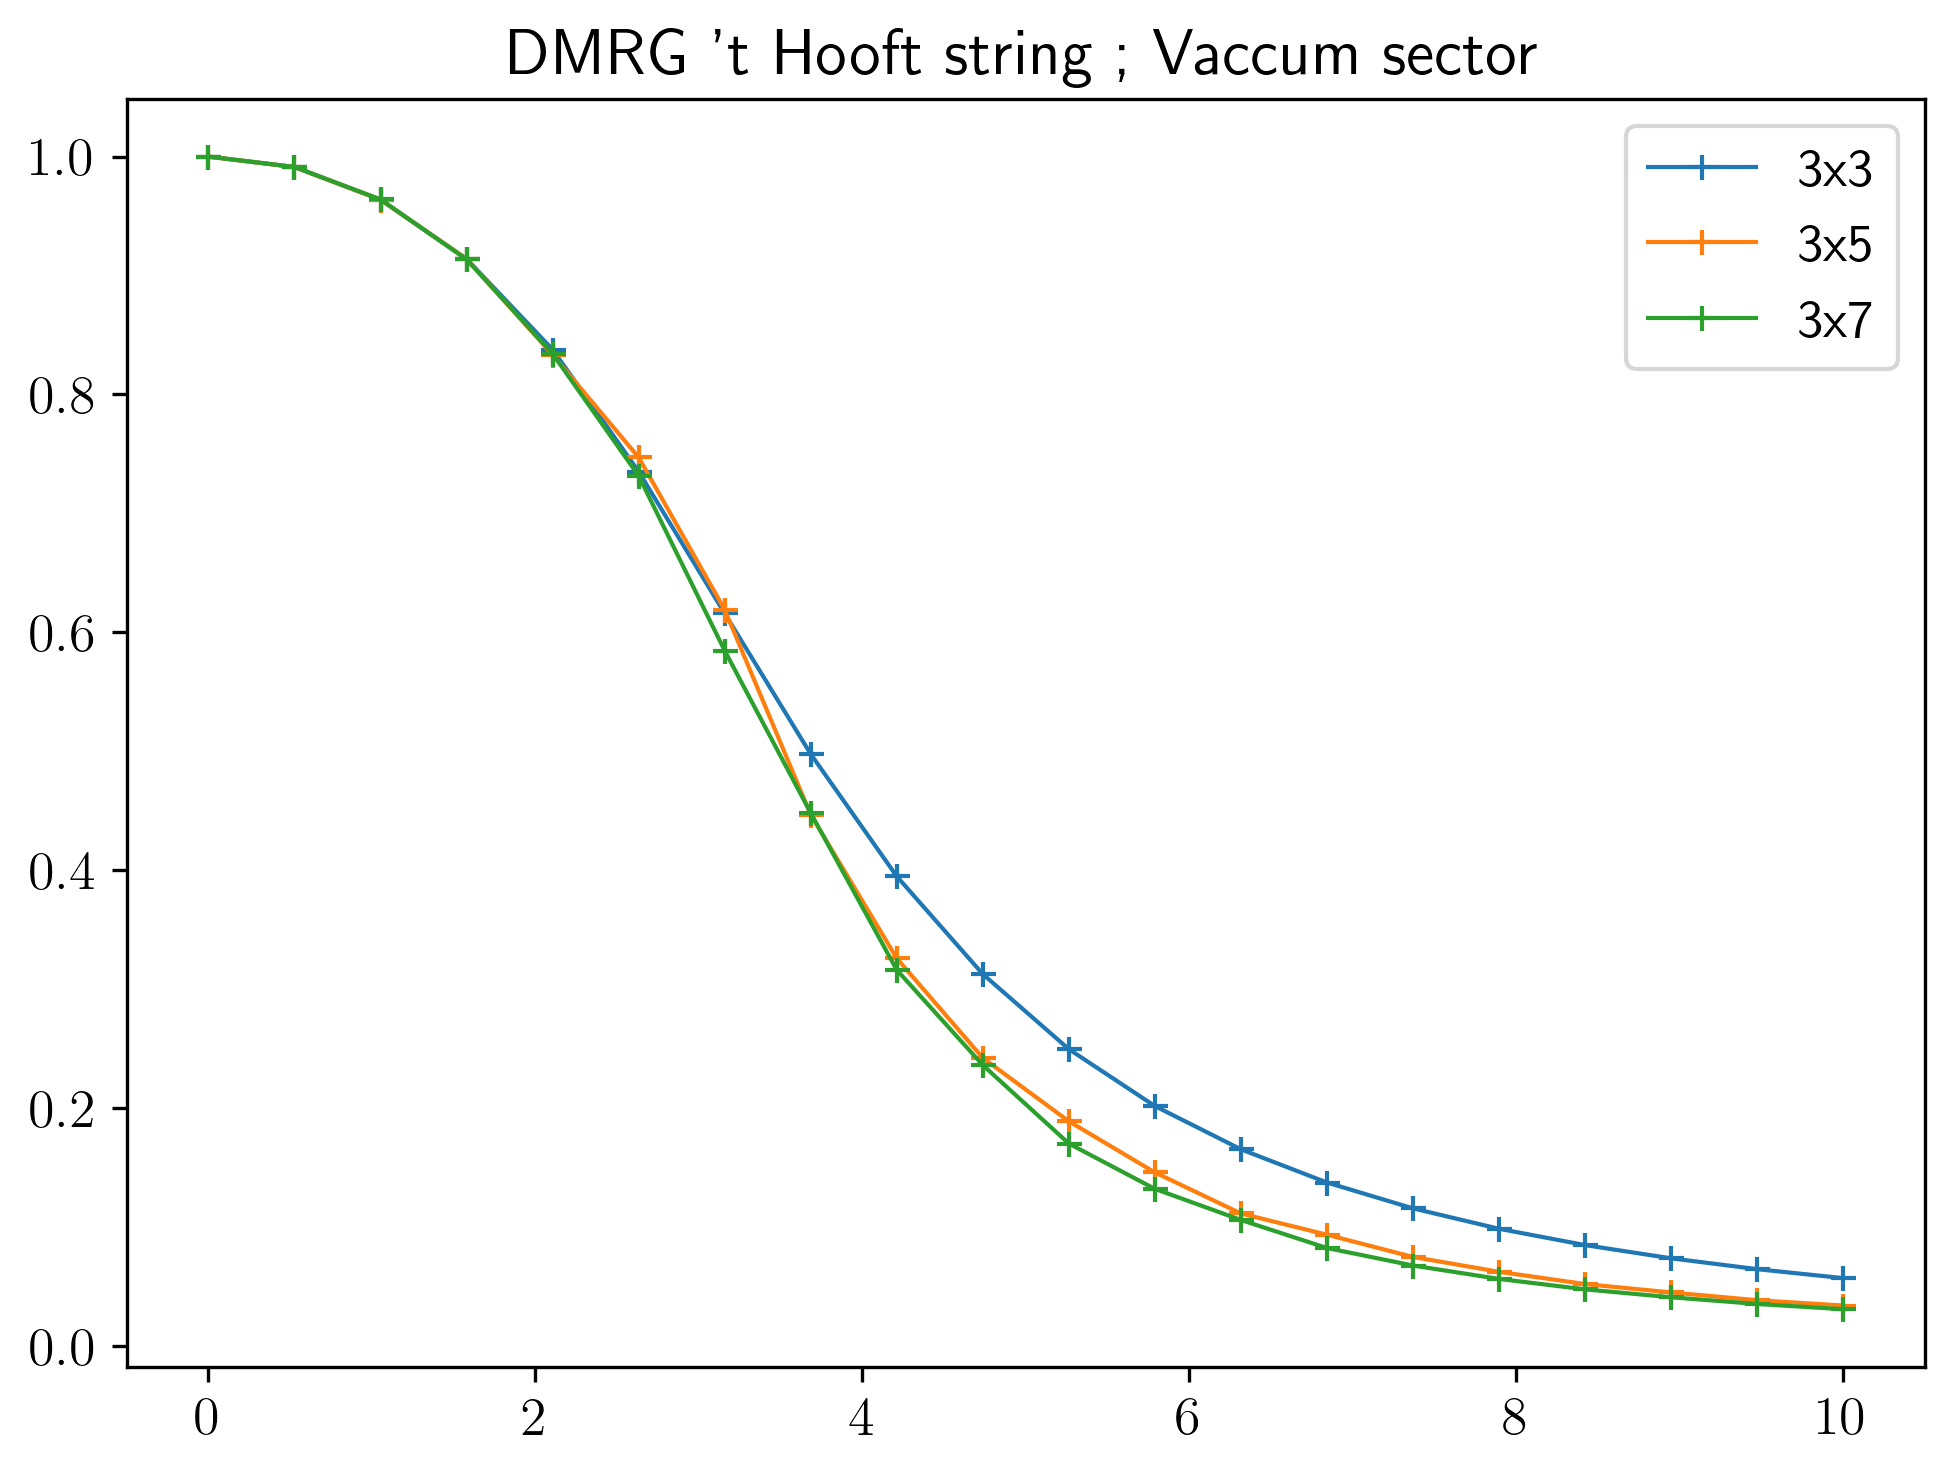

In [2]:
Ls = [3,5,7]
chis = [8,16,32]
ss = [1,2,3]
plt.title("DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_{s}-1_horizontal_Z2_dual_direct_lattice_3x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, string, '+-', linewidth=1, label=f"3x{L}")

plt.legend()
plt.show()

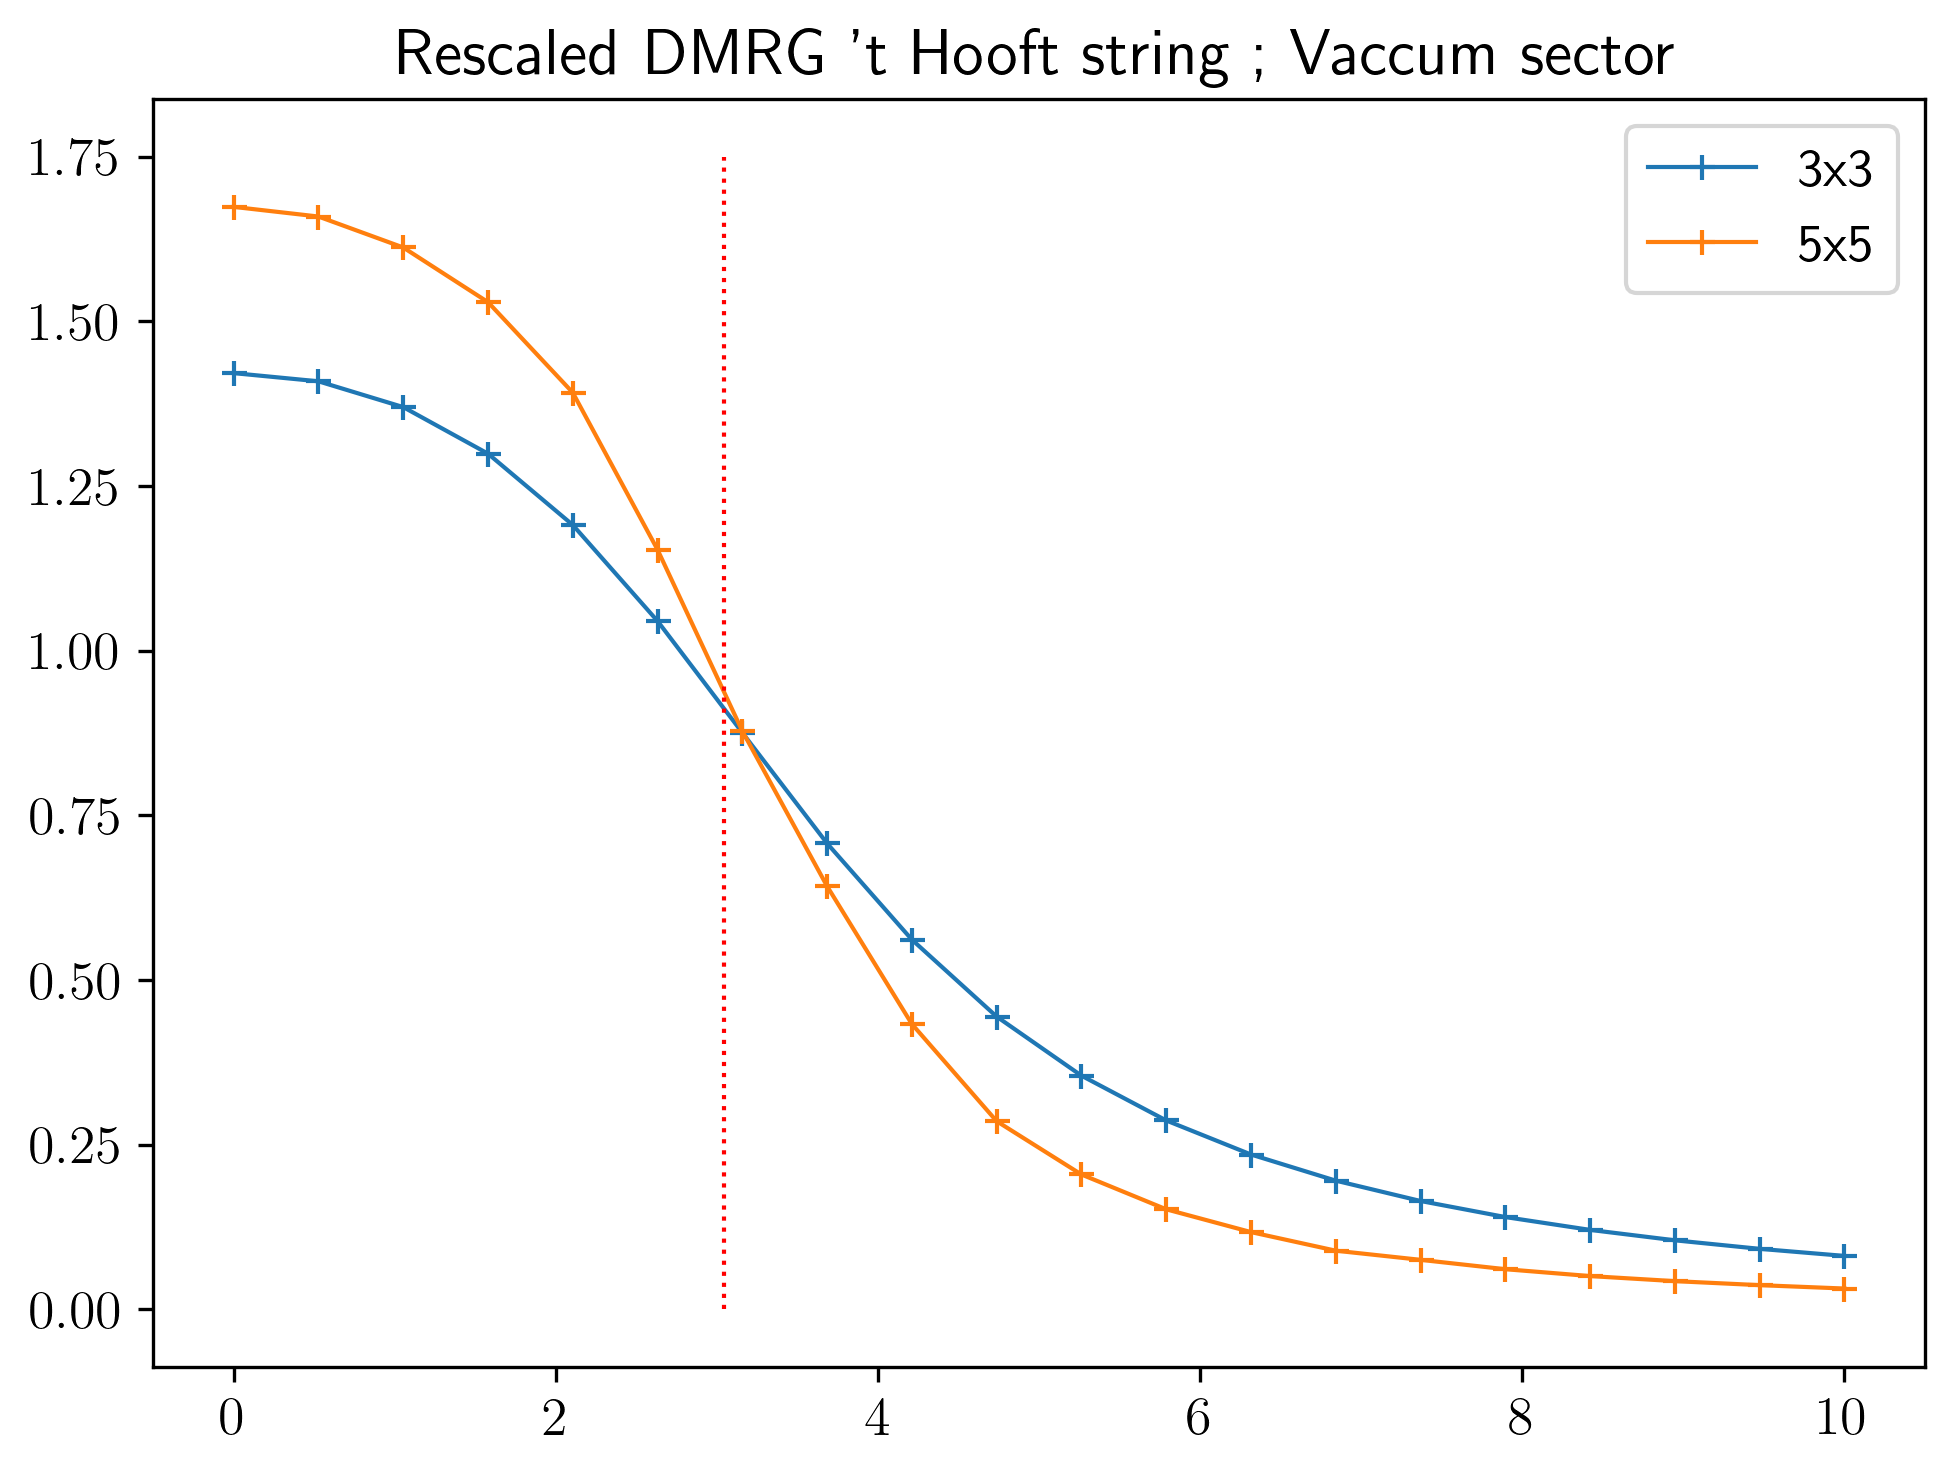

In [15]:
Ls = [3,5]
chis = [8,64]
ss = [1,2]
plt.title("Rescaled DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, (L**(0.32))*string, '+-', linewidth=1, label=f"{L}x{L}")

plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

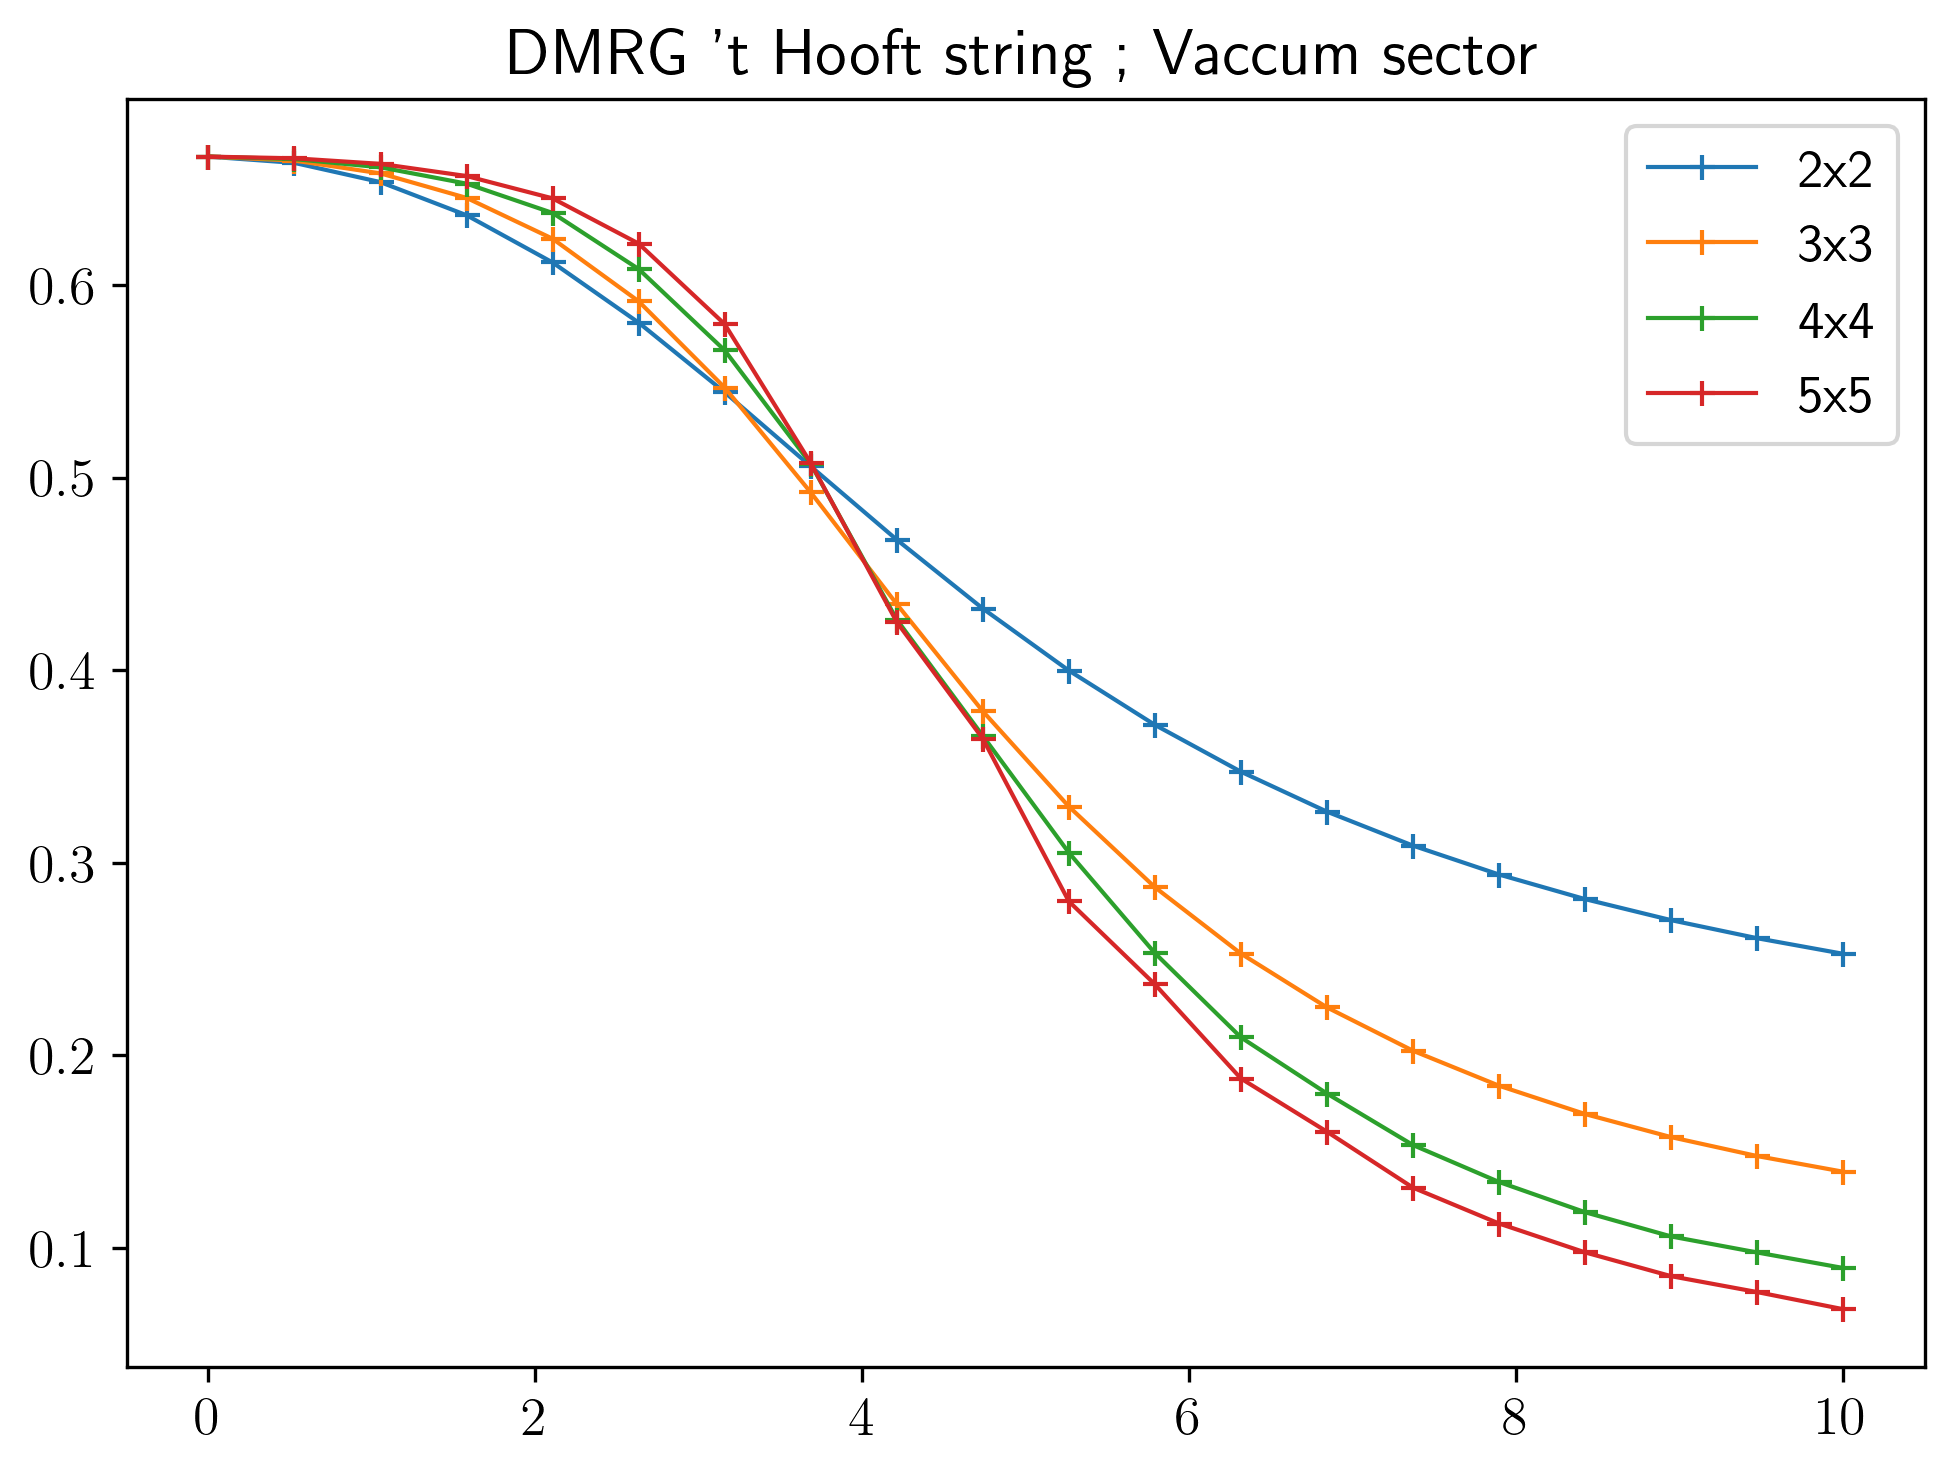

In [57]:
from qs_mps.utils import  binders_cumul
Ls = [2,3,4,5]
chis = [4,8,64,64]
ss = [1,1,1,2]
plt.title("DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string4 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    ub = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, ub, '+-', linewidth=1, label=f"{L}x{L}")
    np.save(f"G:/My Drive/projects/1_Z2/results/critical_exponents/binders_cumulant_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy", ub)

plt.legend()
plt.show()

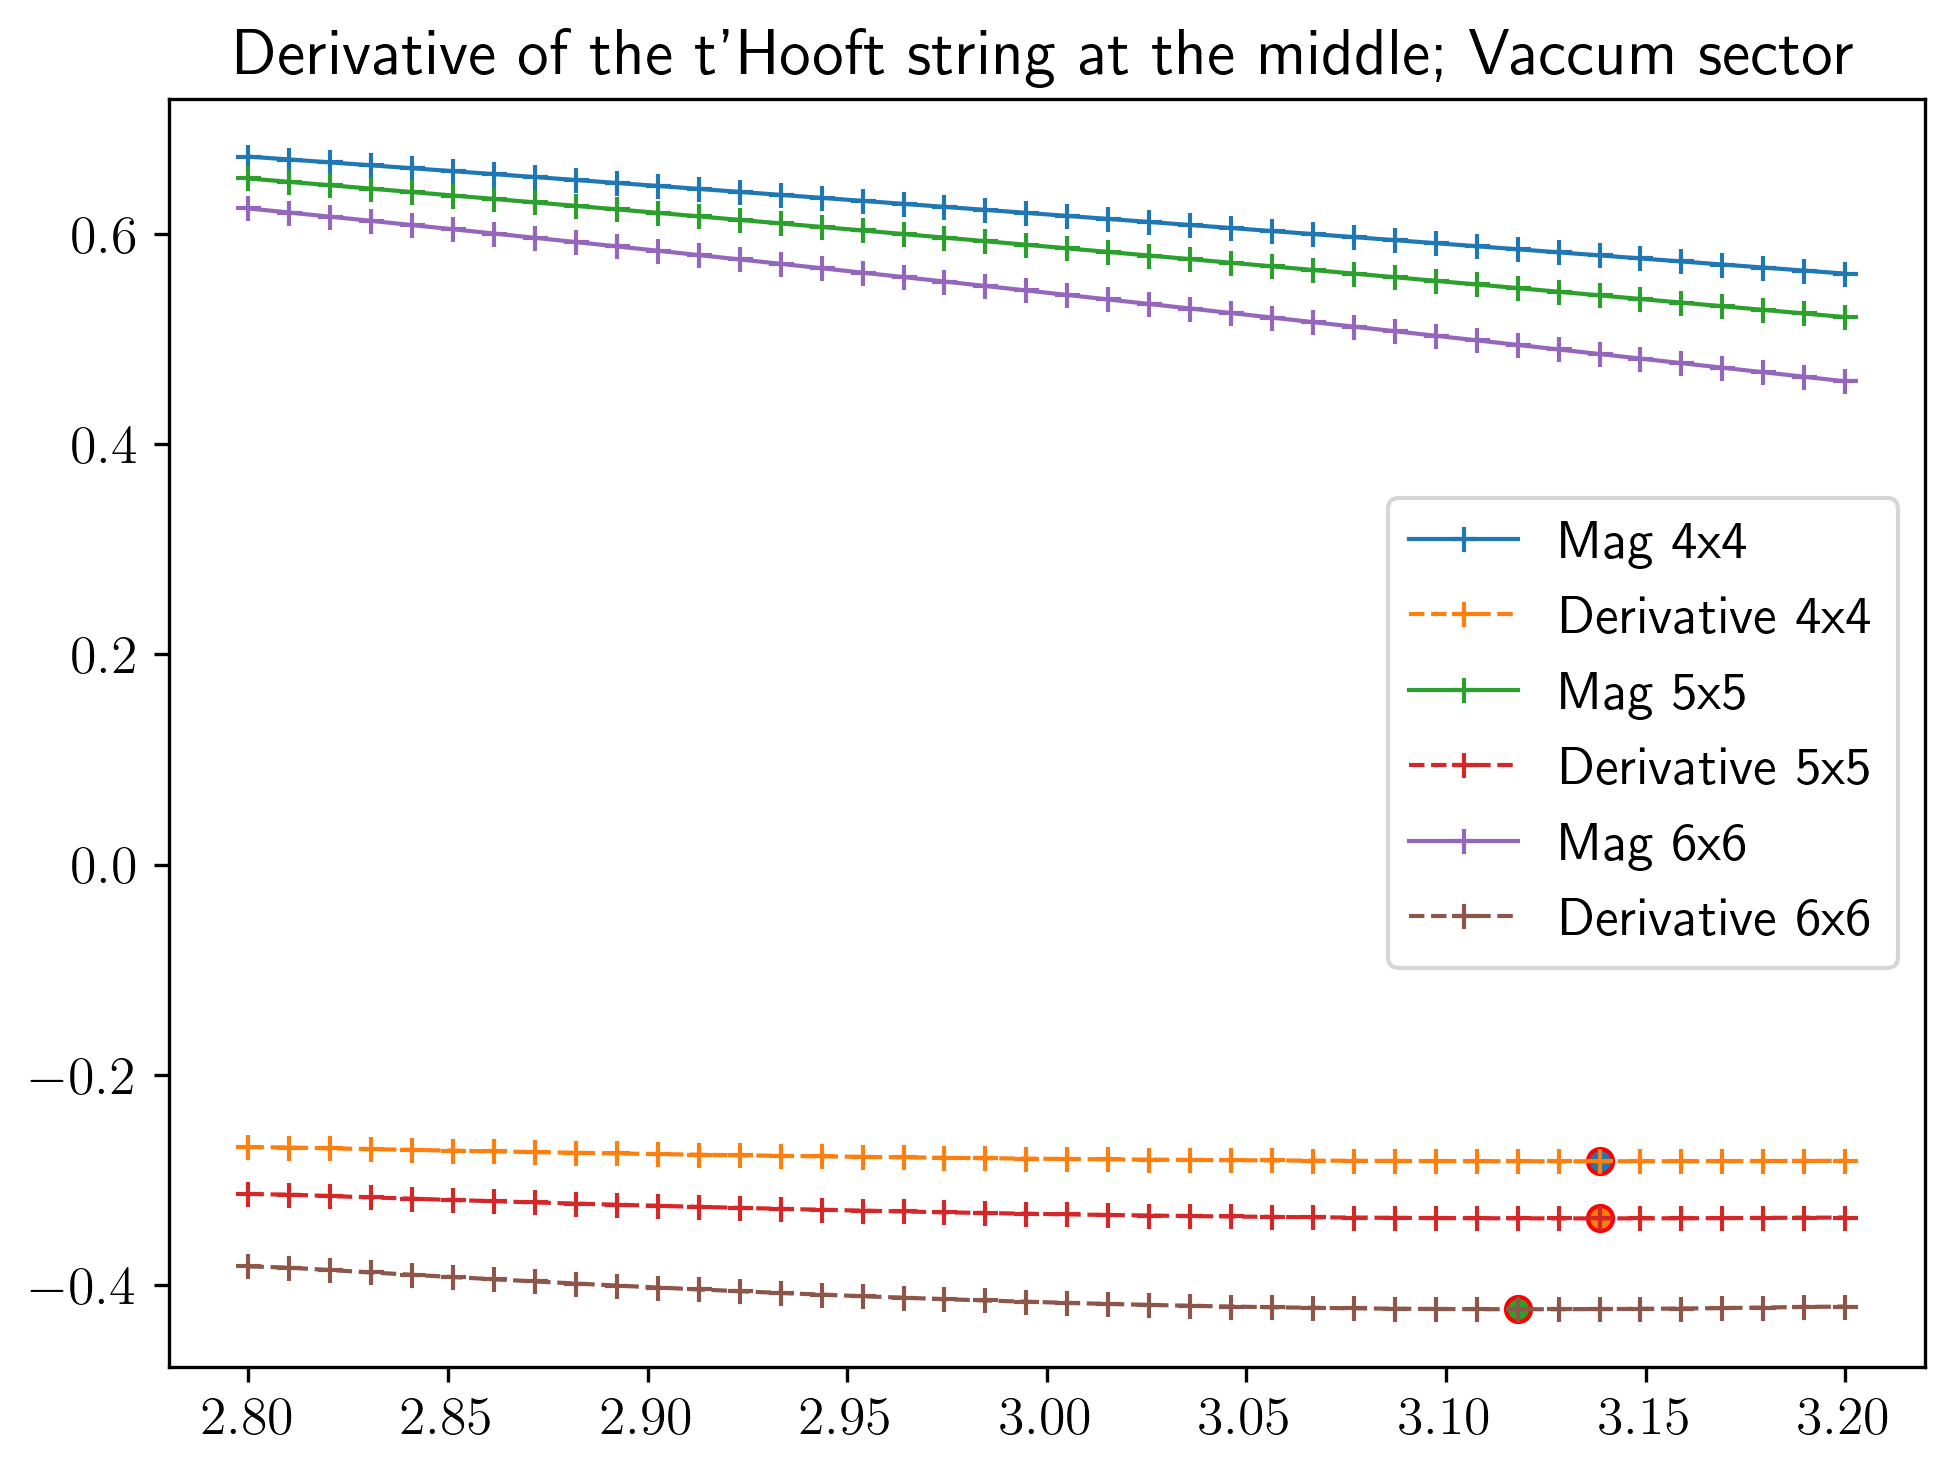

In [15]:
Ls = [4,5,6]
chis = [128,128,256]
ss = [1,2,2]
rs = [2,3,3]
plt.title("Derivative of the t'Hooft string at the middle; Vaccum sector")
h_i = 2.80
h_f = 3.20
npoints = 40
hs = np.linspace(h_i,h_f,npoints)
max_vals = []
x_vals = []
for L, chi, s, r in zip(Ls, chis, ss, rs):
    string = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_{s}-{r}_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    d_string_dh = np.gradient(string, hs)
    dm_min = np.argmin(d_string_dh)
    max_vals.append(np.min(d_string_dh))
    x_vals.append(hs[dm_min])
    plt.plot(hs, string, '+-', linewidth=1, label=f"Mag {L}x{L}")
    plt.plot(hs, d_string_dh, '+--', linewidth=1, label=f"Derivative {L}x{L}")
    plt.scatter(hs[dm_min], np.min(d_string_dh), marker='o', facecolors=None, edgecolors="red")

# plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

In [13]:
x_vals[0] = x_vals[0]+0.01
print(x_vals)

[3.158461538461538, 3.1384615384615384, 3.117948717948718]


In [14]:
x_data = Ls
y_data = x_vals
def power_law(L, a, b, c):
    return a + b*(L**c)
popt, copt = curve_fit(power_law, x_data, y_data, p0=[3.04, 1, -1/0.62], maxfev=5000)
print(f"the nu: {-1/popt[2]}")
print(f"the hc: {popt[0]}")

the nu: 1377.5158712905977
the hc: -133.97529986173473


## Extracting the $h_c$ from the Binder's Cumulant

* Fit $U_c(L,h)$ for an interval of $h\text{s}$ which includes the crossing of the curves
* Find and approximate $h_c$ where the curves cross
* Get a more precise value by using the fit functions found and the theoretical value $h_{th}$

In [54]:
# in the case above we select h between 2 and 6
hs_new = hs[4:13]

In [58]:
ub1 = np.load(f"G:/My Drive/projects/1_Z2/results/critical_exponents/binders_cumulant_1-1_horizontal_Z2_dual_direct_lattice_4x4_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_64.npy")
ub2 = np.load(f"G:/My Drive/projects/1_Z2/results/critical_exponents/binders_cumulant_2-1_horizontal_Z2_dual_direct_lattice_5x5_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_64.npy")
ub1_new = ub1[4:13]
ub2_new = ub2[4:13]
for idx, h in enumerate(hs_new):
    if ub2_new[idx] > ub1_new[idx]:
        print("h critical not found")
    else:
        hc_plus = h
        hc_minus = hs_new[idx-1]
        print(f"h- : {hc_minus}")
        print(f"h+ : {hc_plus}")
        break

h critical not found
h critical not found
h critical not found
h critical not found
h- : 3.6842105263157894
h+ : 4.2105263157894735


In [59]:
# fit the binders cumulant
max_reps = 100
acc = 1e-10
hc_minus = 3.6842105263157894
hc_plus = 4.2105263157894735
for rep in range(max_reps):
    print(f"Repetition: {rep+1}")
    h_mean = (hc_minus+hc_plus)/2
    ub1_fit = np.interp(h_mean, hs_new, ub1_new)
    ub2_fit = np.interp(h_mean, hs_new, ub2_new)
    if ub2_fit > ub1_fit:
        hc_minus = h_mean
    if ub2_fit < ub1_fit:
        hc_plus = h_mean
    if abs(ub2_fit - ub1_fit) < acc:
        hc_aprox = h_mean
        print(f"h critical found in {rep+1} repetitions with accuracy {acc}! h_c: {h_mean}")
        break
    if rep == (max_reps-1):
        print(f"h critical found for a convergence of binders cumulant of {abs(ub2_fit - ub1_fit):1e}")
        print(f"h_c: {h_mean}")
        hc_aprox = h_mean
     

Repetition: 1
Repetition: 2
Repetition: 3
Repetition: 4
Repetition: 5
Repetition: 6
Repetition: 7
Repetition: 8
Repetition: 9
Repetition: 10
Repetition: 11
Repetition: 12
Repetition: 13
Repetition: 14
Repetition: 15
Repetition: 16
Repetition: 17
Repetition: 18
Repetition: 19
Repetition: 20
Repetition: 21
Repetition: 22
h critical found in 22 repetitions with accuracy 1e-10! h_c: 3.8226292007847835


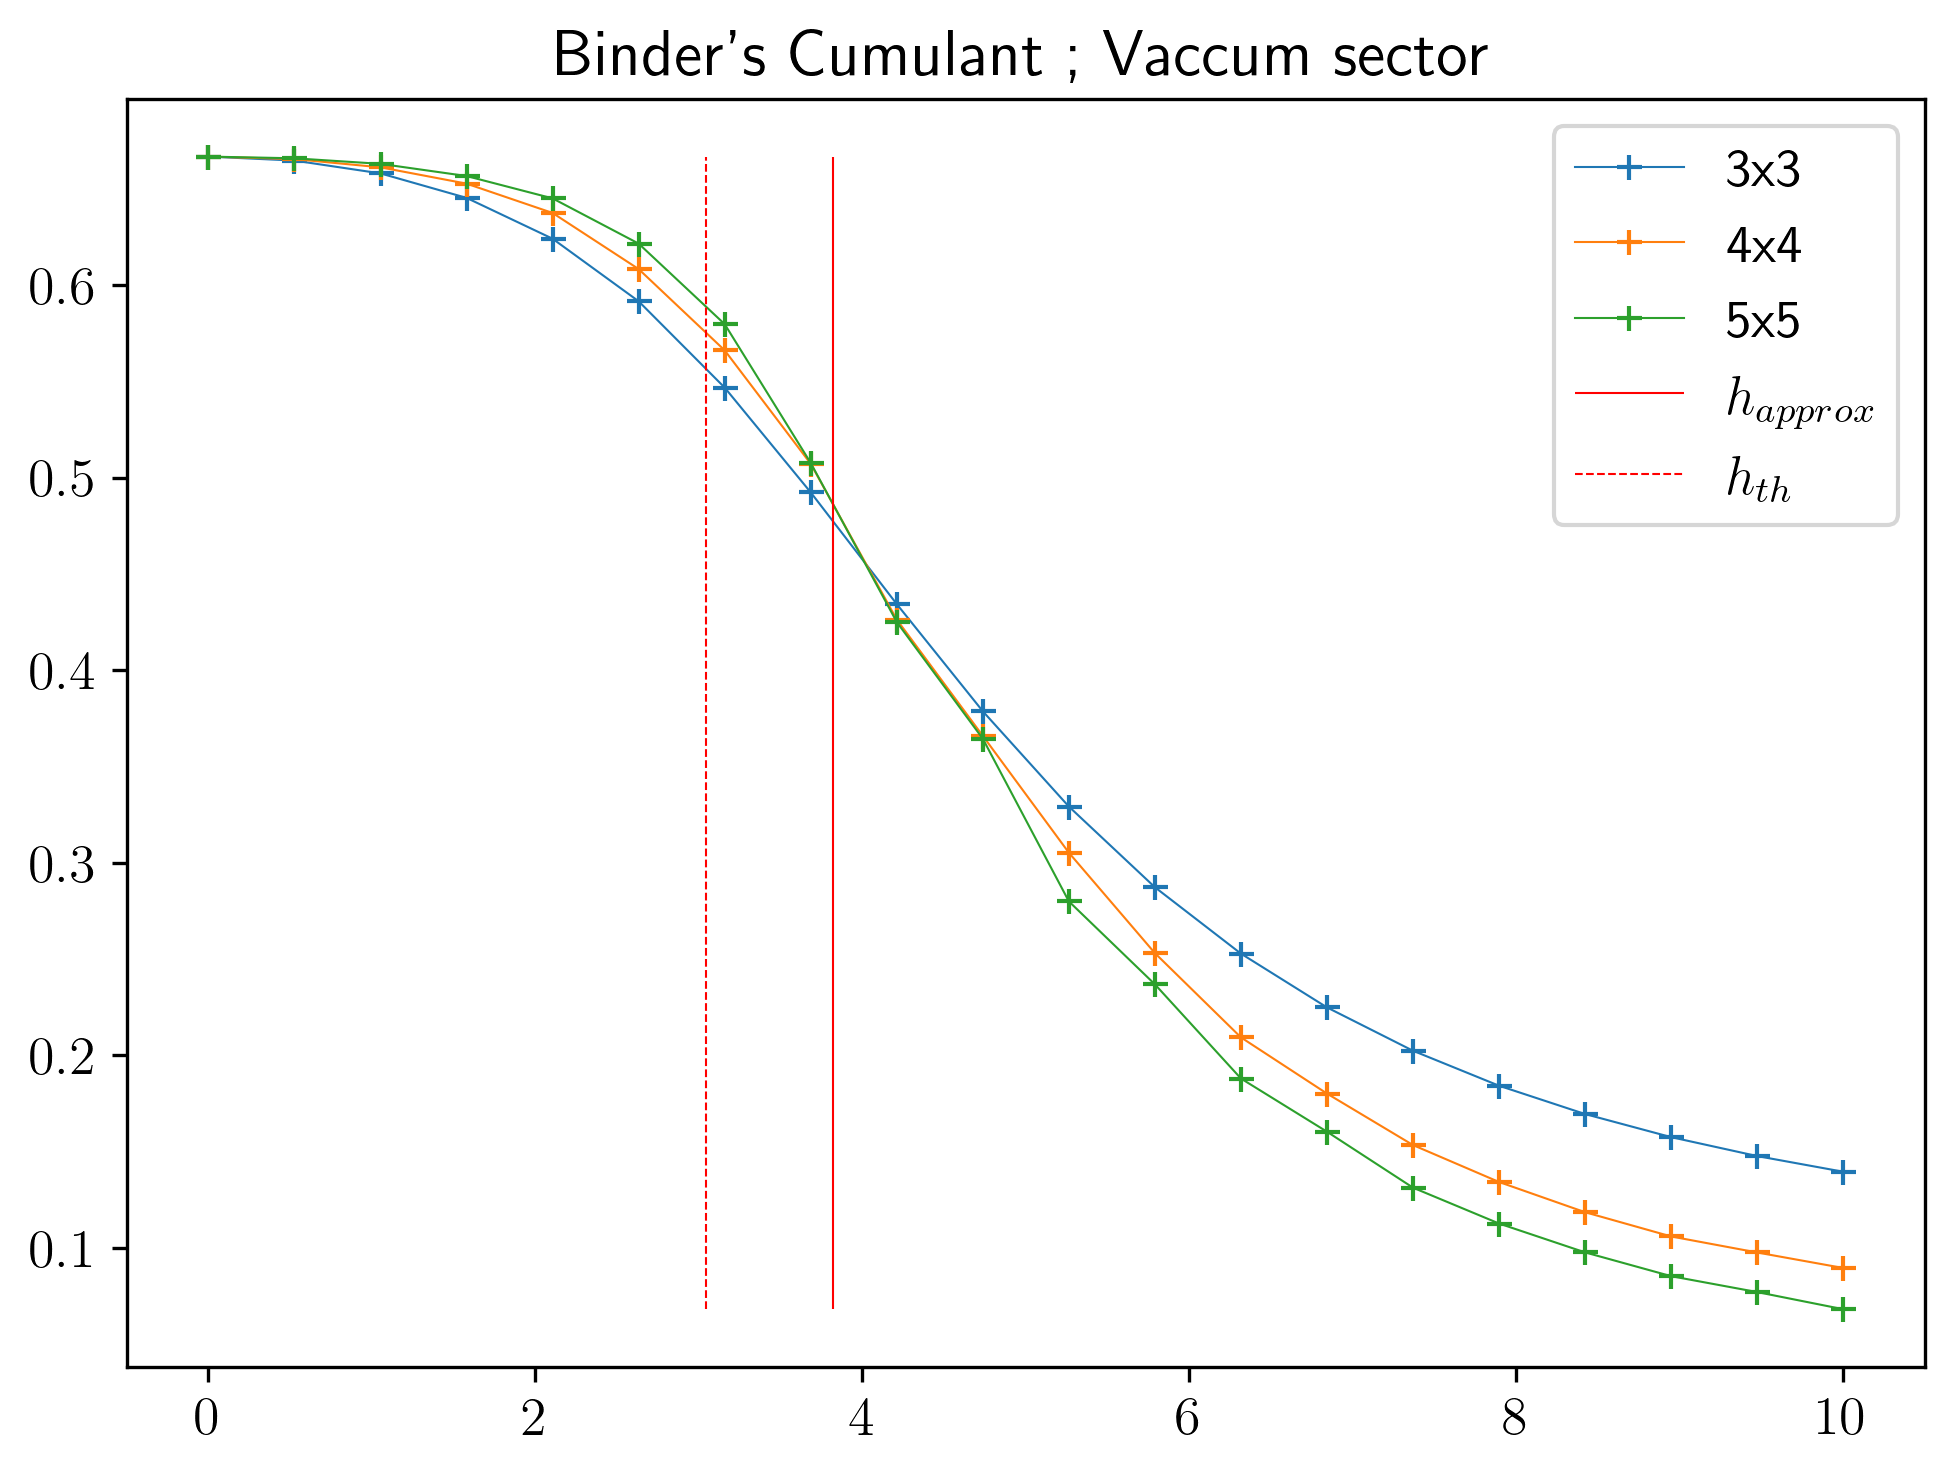

In [67]:
Ls = [3,4,5]
chis = [8,64,64]
ss = [1,1,2]
plt.title("Binder's Cumulant ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string4 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    ub = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, ub, '+-', linewidth=0.5, label=f"{L}x{L}")

hc_th = 3.044
plt.vlines(x=hc_aprox, ymin=min(ub), ymax=max(ub), linewidth=0.5, colors='red', label="$h_{approx}$")
plt.vlines(x=hc_th, ymin=min(ub), ymax=max(ub), linewidth=0.5, linestyles="--", colors='red', label="$h_{th}$")
plt.legend()
plt.savefig(f"G:/My Drive/projects/1_Z2/figures/critical_exponents/binders_cumulant_vacuum_changing_L.png")


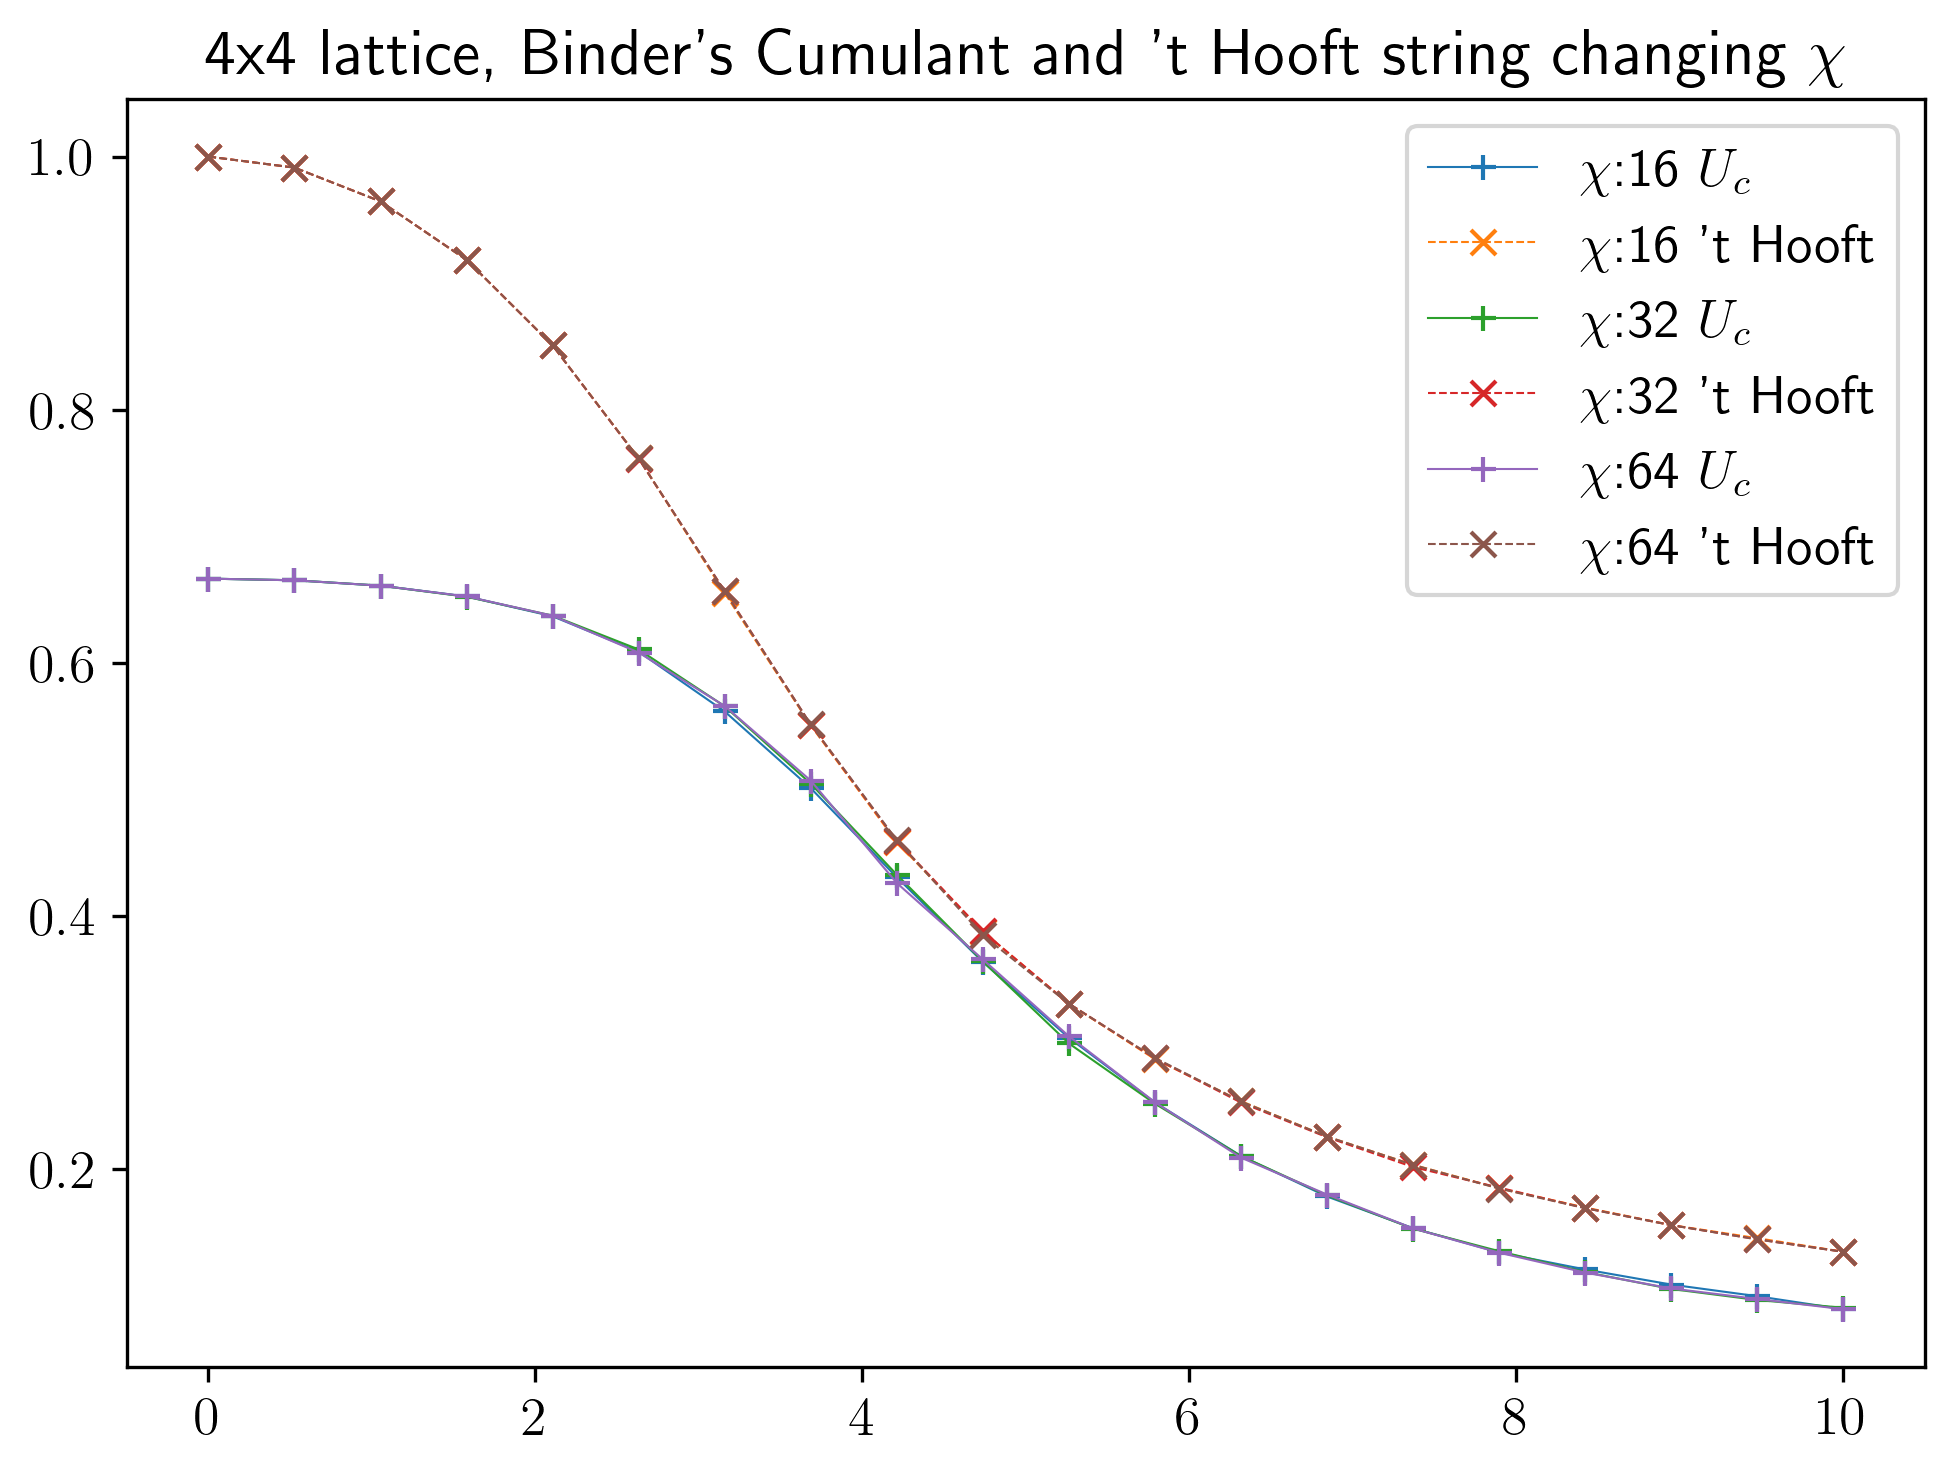

In [64]:
L = 4
s = 1
chis = [16,32,64]
plt.title("4x4 lattice, Binder's Cumulant and 't Hooft string changing $\\chi$") 
for chi in chis:
    string4 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    string = np.load(f"G:/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_3-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    ub = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, ub, '+-', linewidth=0.5, label=f"$\\chi$:{chi} $U_c$")
    plt.plot(hs, string, 'x--', linewidth=0.5, label=f"$\\chi$:{chi} 't Hooft")
plt.legend()
plt.savefig(f"G:/My Drive/projects/1_Z2/figures/critical_exponents/binders_cumulant_vs_thooft_string_of_4x4_lattice_vacuum.png")

### Extraction of $h_c$ with the $maximum$ of the Susceptibility $\chi_M$

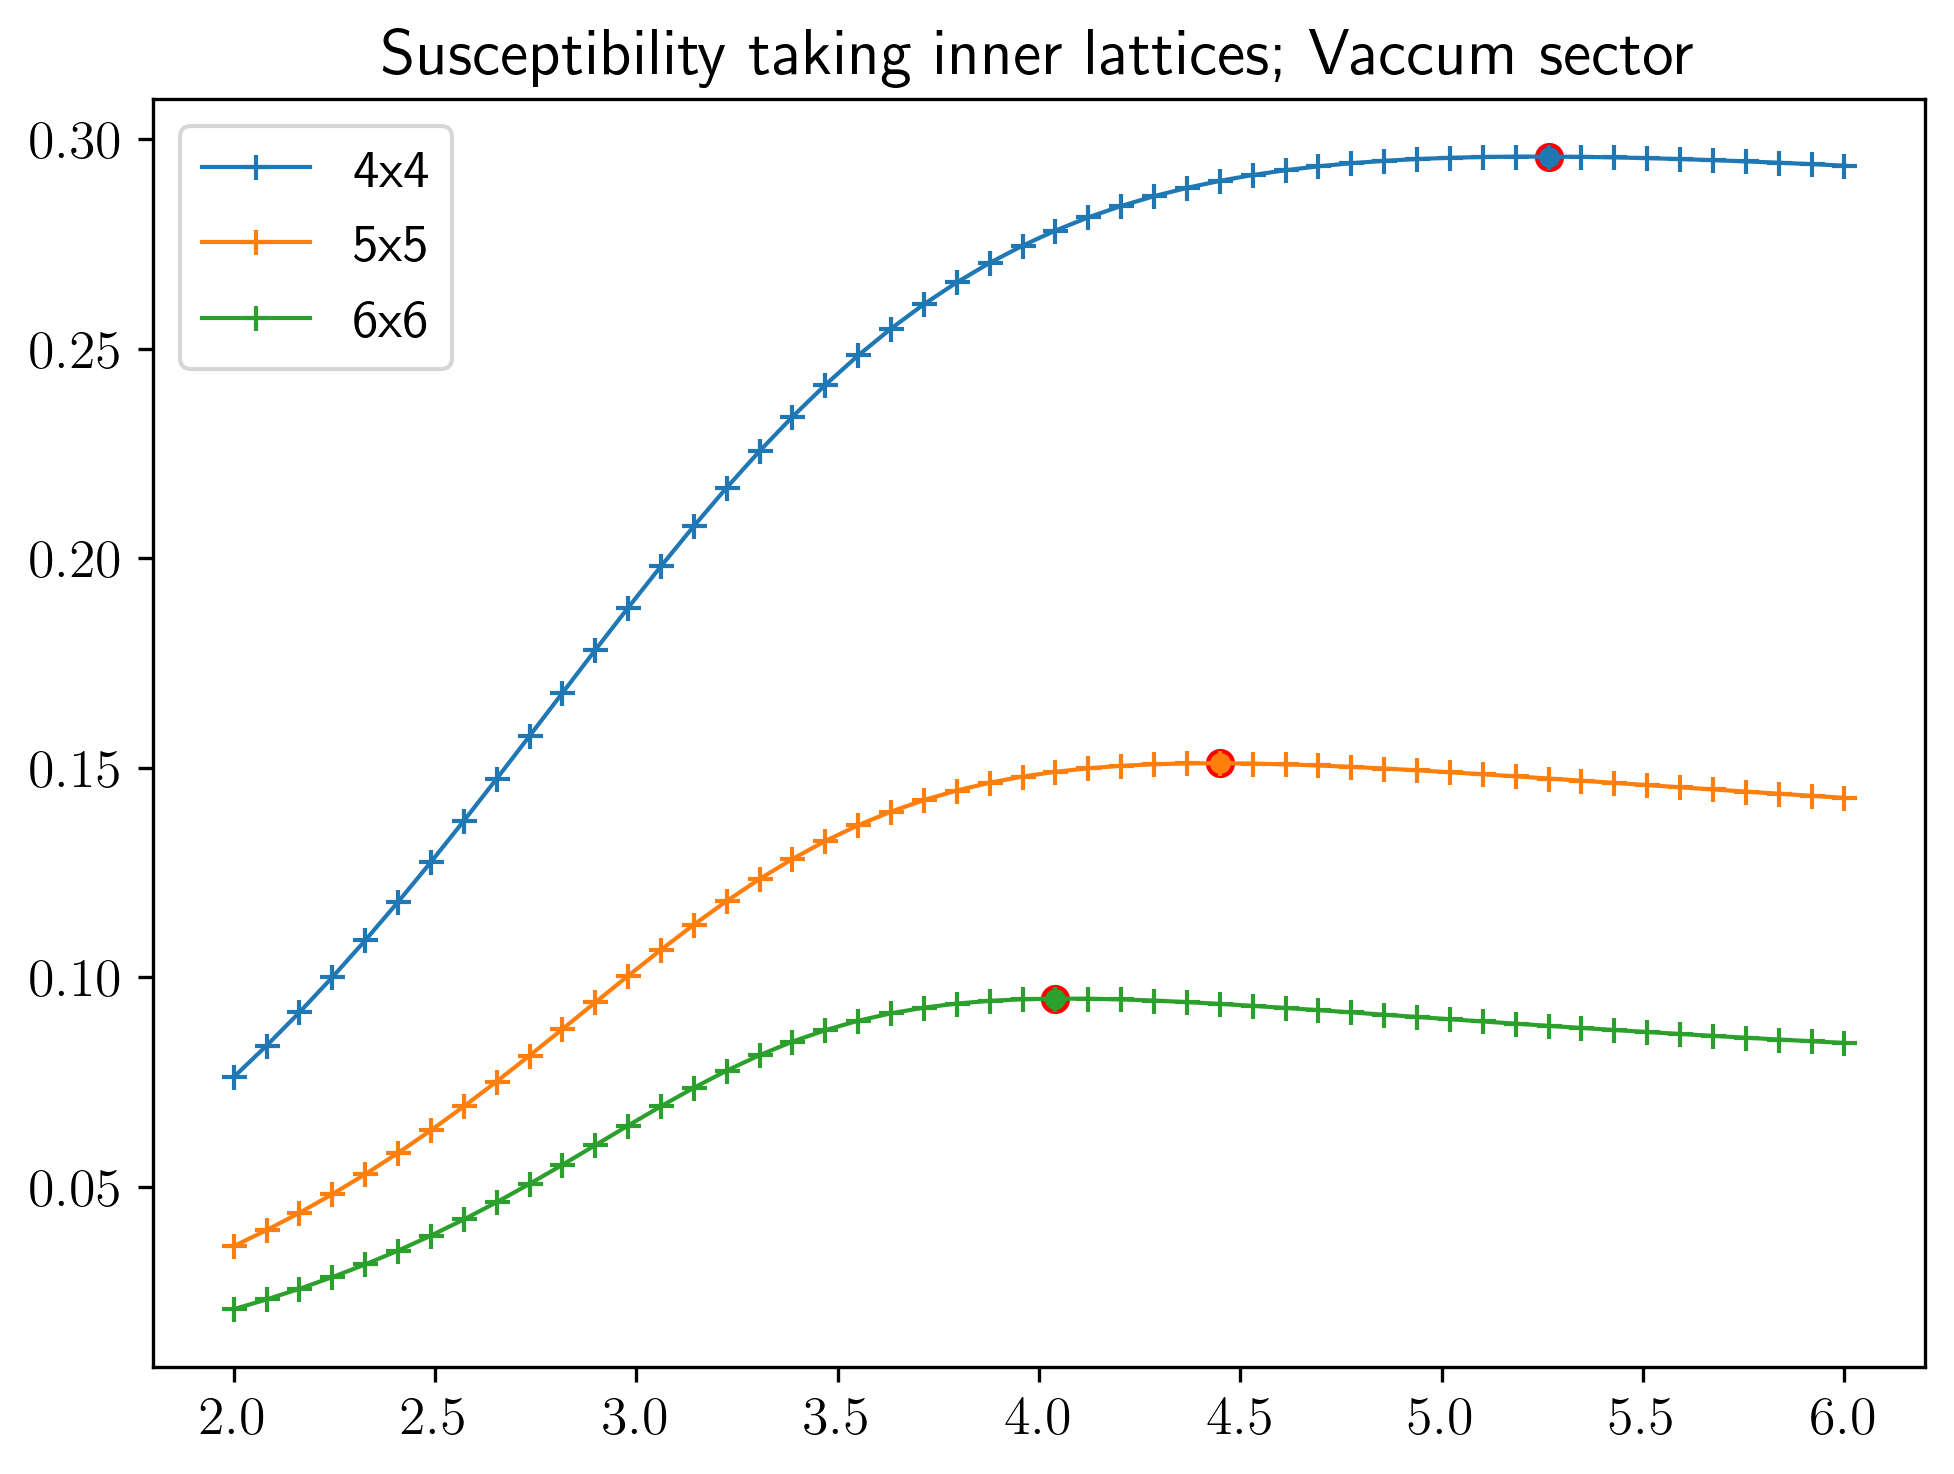

In [117]:
Ls = [4,5,6]
chis = [64,128,256]
plt.title("Susceptibility taking inner lattices; Vaccum sector")
hs = np.linspace(2,6,50)
max_vals = []
x_vals = []
for L, chi in zip(Ls, chis):
    string = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
    string2 = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
    sus = (string2 - string**2)
    h_max = np.argmax(sus)
    max_vals.append(np.max(sus))
    x_vals.append(hs[h_max])
    plt.plot(hs, sus, '+-', linewidth=1, label=f"{L}x{L}")
    plt.scatter(hs[h_max], np.max(sus), marker='o', facecolors=None, edgecolors="red")

# plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

In [108]:
from qs_mps.utils import curve_fit

def power_law(L, a, c, x):
    return a + c*(L**x)

x_data = [4,5,6]
y_data = x_vals
# guess = [3.044, 1, -1/0.62]
popt, copt = curve_fit(power_law, x_data, y_data)
print(f"the h_c: {popt[0]}")
print(f"the nu: {-1/popt[2]}")

the h_c: 3.298362423376721
the nu: 0.41617093486693874


/Users/fradm98/opt/anaconda3/envs/mps/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


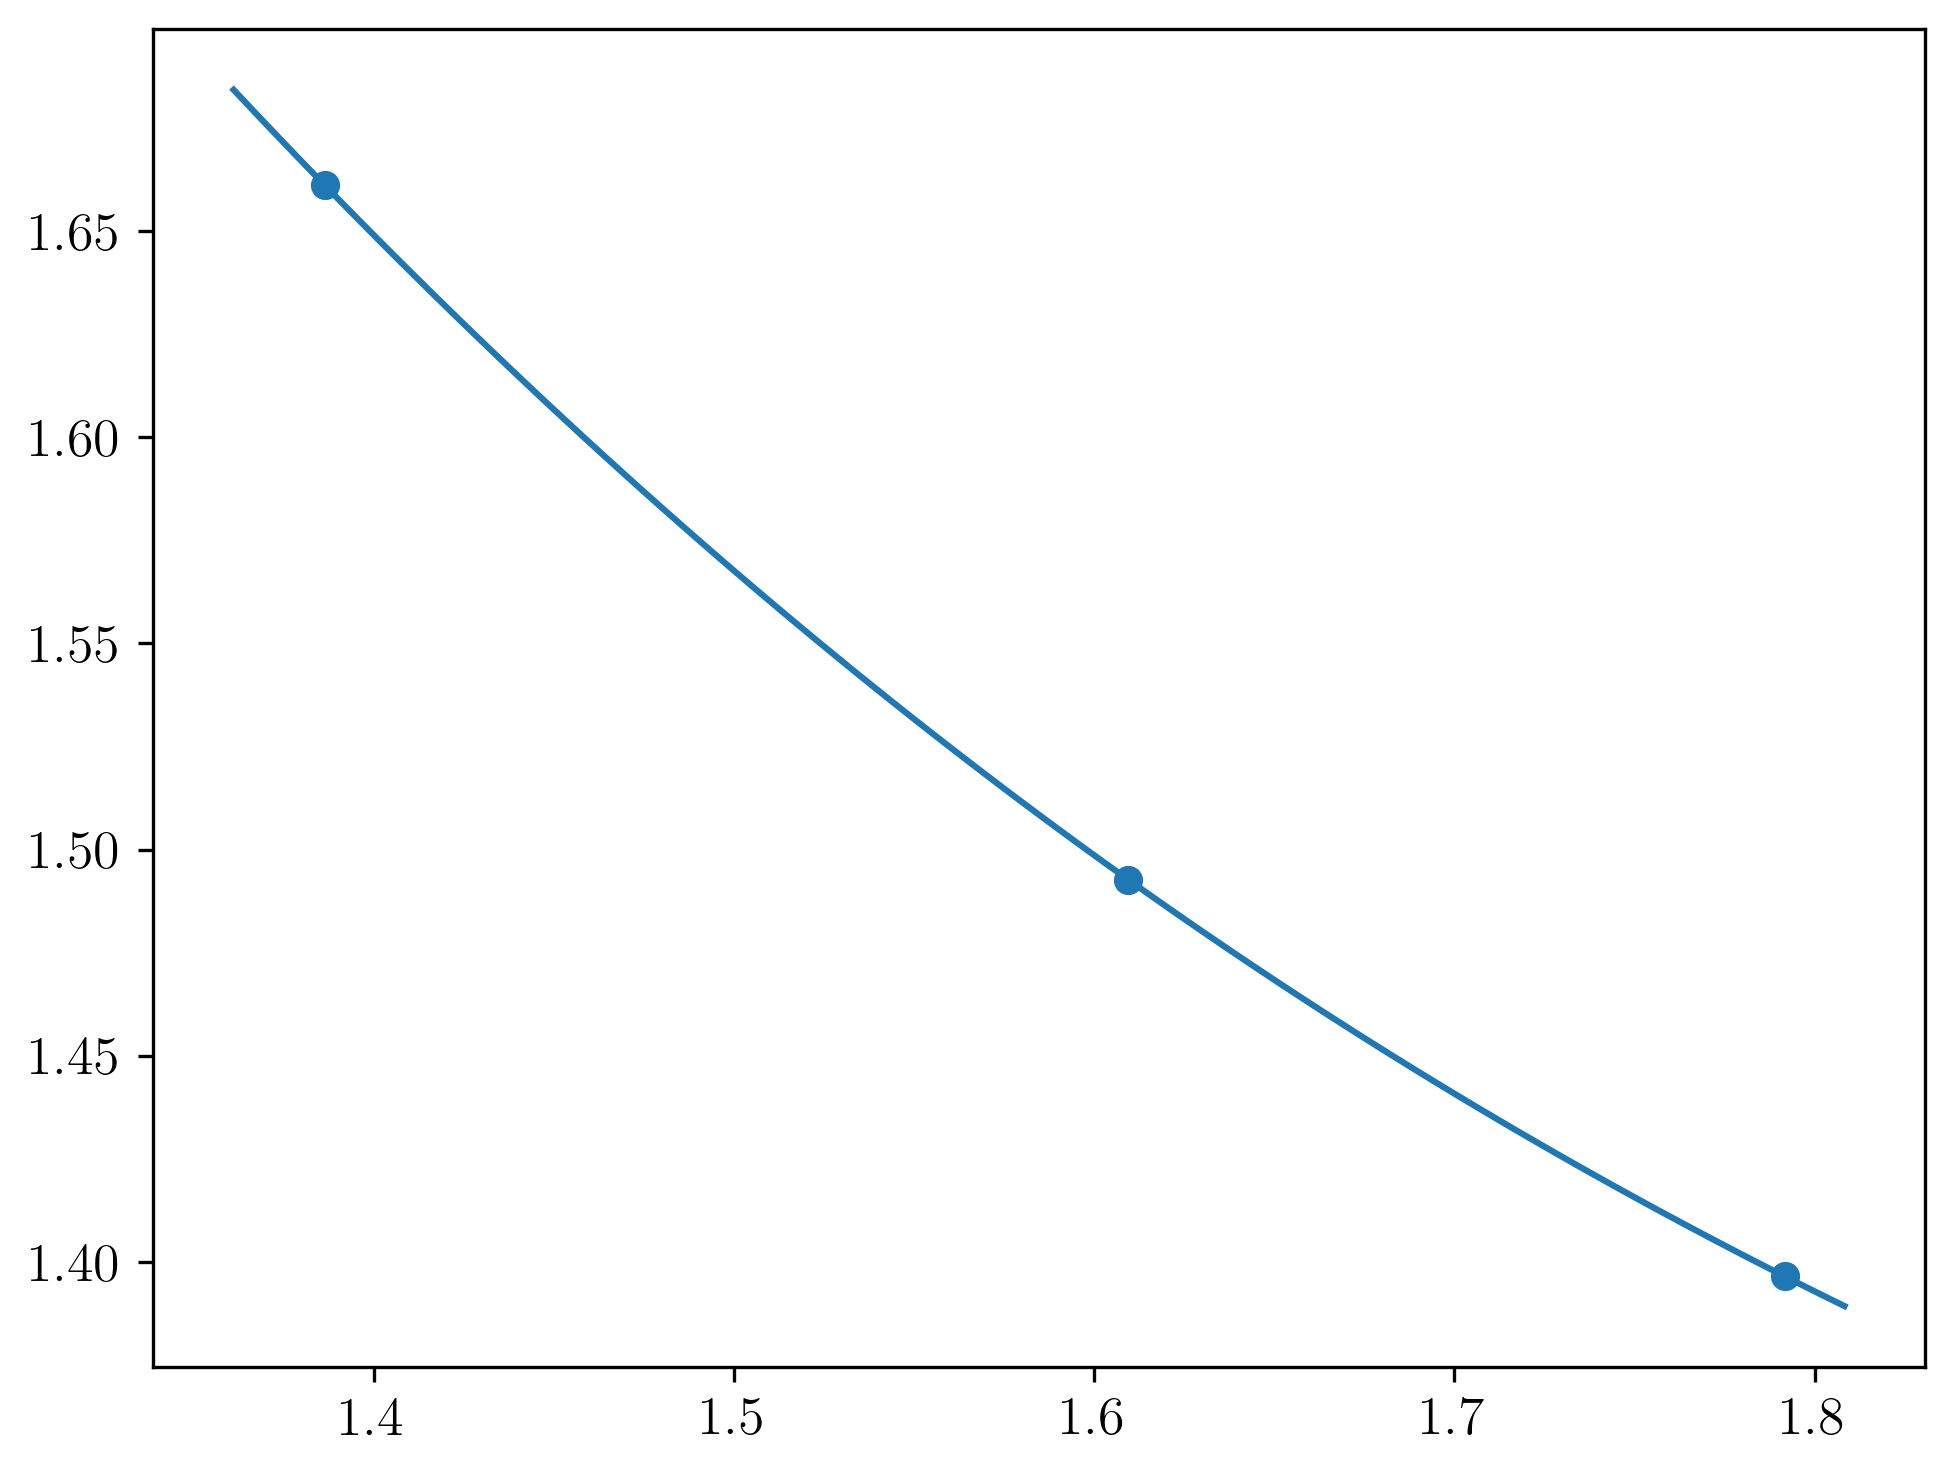

In [109]:
plt.plot(np.log(np.linspace(3.9,6.1, 100)), np.log(power_law(np.linspace(3.9,6.1, 100), popt[0], popt[1], popt[2])))
plt.scatter(np.log(x_data), np.log(y_data))

Extraction of $\gamma$ using the found $h_c$ and $\nu$

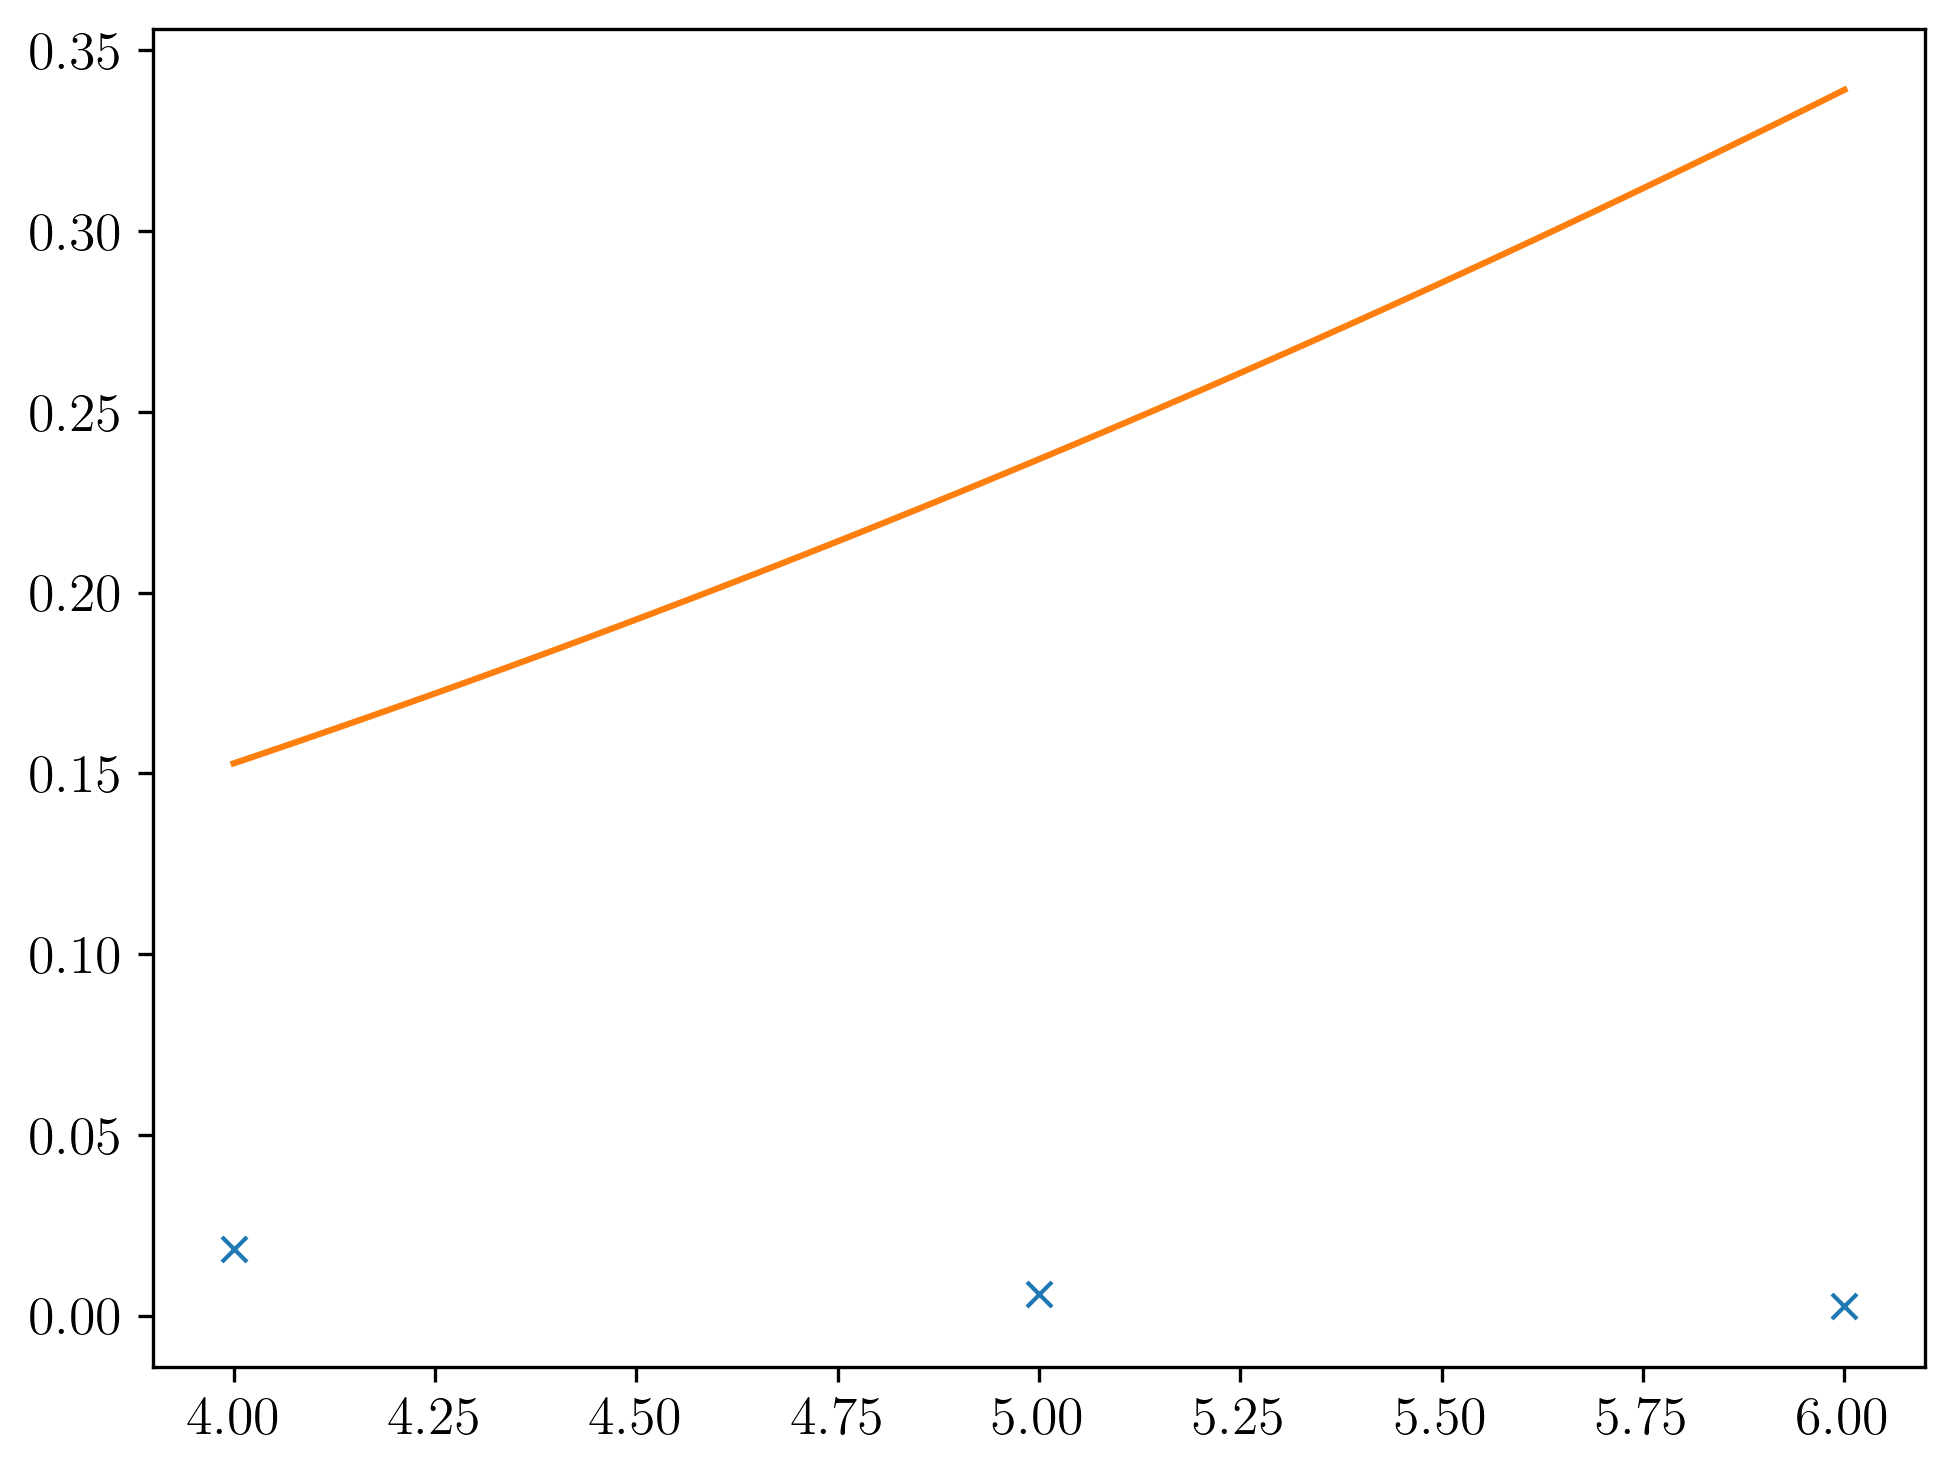

In [116]:
plt.plot(x_data, y_data, 'x')
plt.plot(np.linspace(4,6,100), power_law(np.linspace(4,6,100), a=0, c=0.01, x=1.237/0.629))

In [115]:
x_data = [4,5,6]
y_data = max_vals
guess = [0, 1, 1.237/0.629]
popt, copt = curve_fit(power_law, x_data, y_data)
print(f"the gamma: {popt[2]*1.237075}")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

### Derivative of the Magnetization

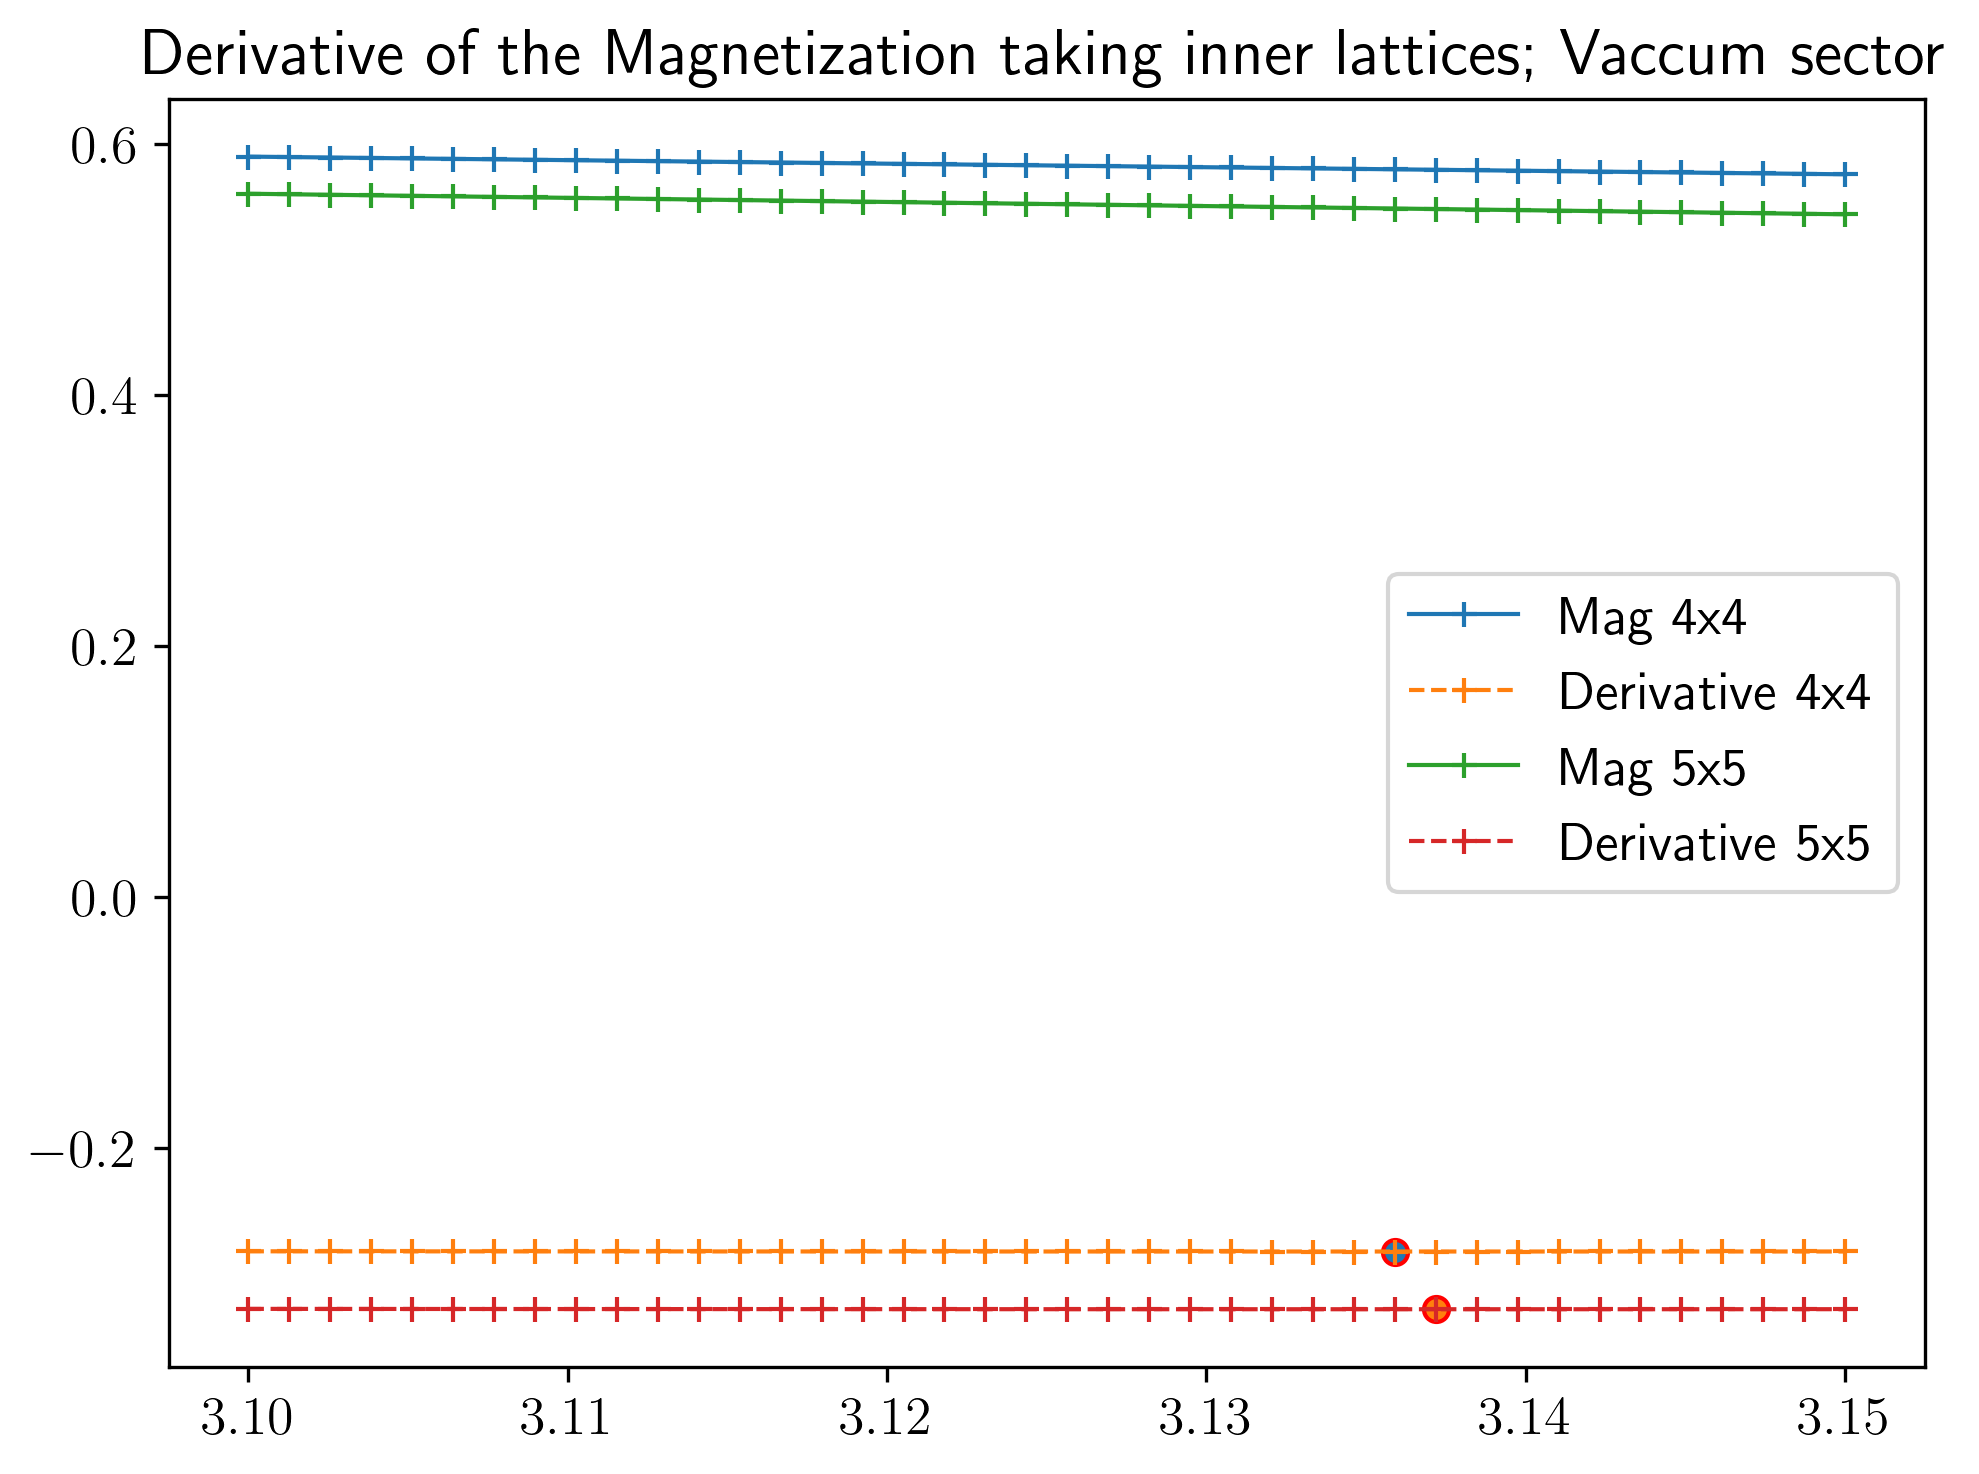

In [67]:
Ls = [4,5]
chis = [128,128]
plt.title("Derivative of the Magnetization taking inner lattices; Vaccum sector")
h_i = 3.10
h_f = 3.15
npoints = 40
hs = np.linspace(h_i,h_f,npoints)
max_vals = []
x_vals = []
for L, chi in zip(Ls, chis):
    string = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    d_string_dh = np.gradient(string, hs)
    dm_min = np.argmin(d_string_dh)
    max_vals.append(np.min(d_string_dh))
    x_vals.append(hs[dm_min])
    plt.plot(hs, string, '+-', linewidth=1, label=f"Mag {L}x{L}")
    plt.plot(hs, d_string_dh, '+--', linewidth=1, label=f"Derivative {L}x{L}")
    plt.scatter(hs[dm_min], np.min(d_string_dh), marker='o', facecolors=None, edgecolors="red")

# plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

In [68]:
x_vals

[3.135897435897436, 3.137179487179487]

In [66]:
x_vals

[3.1384615384615384, 3.1384615384615384, 3.128205128205128]

In [62]:
x_data = [4,5,6]
y_data = x_vals
def power_law(L, a, b, c):
    return a + b*(L**c)
popt, copt = curve_fit(power_law, x_data, y_data, [3.04, 1, -1/0.62], maxfev=5000)
print(f"the nu: {-1/popt[2]}")
print(f"the hc: {popt[0]}")

the nu: 1299.3301355865406
the hc: -28.519930384942004


/Users/fradm98/opt/anaconda3/envs/mps/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


-1/nu: -0.007775826732294776


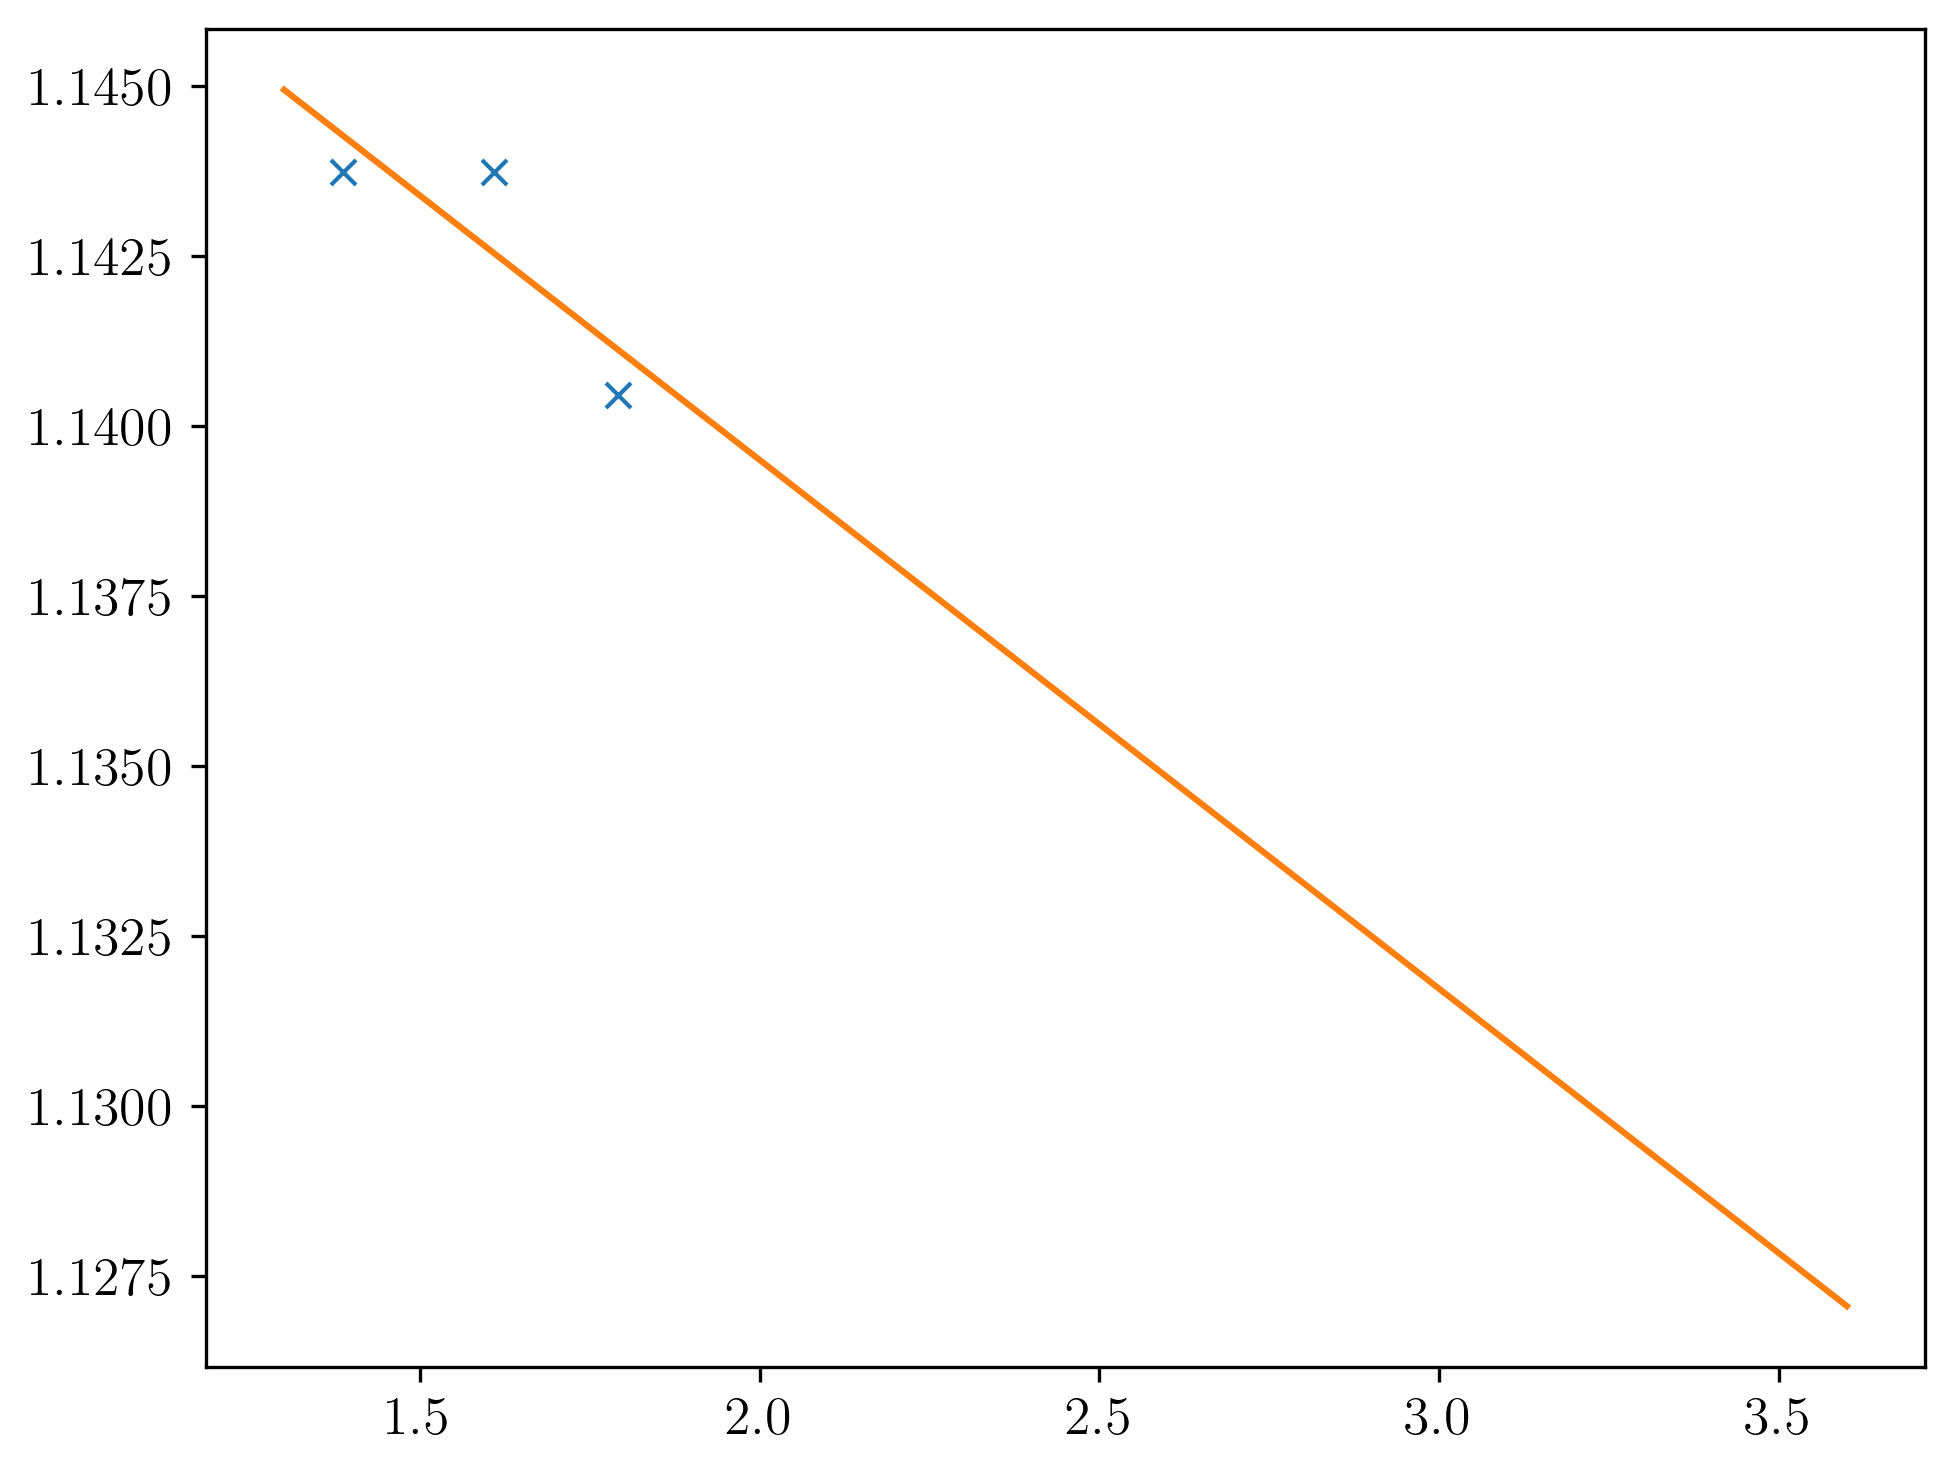

In [19]:
plt.plot(np.log(x_data),np.log(np.abs(y_data)), 'x')
def func(x, slp, a):
    return a + slp * x

popt, copt = curve_fit(func, np.log(x_data), np.log(np.abs(y_data)))
print(f"-1/nu: {popt[0]}")
plt.plot(np.linspace(1.3,3.6,100), func(np.linspace(1.3,3.6,100), popt[0], popt[1]))

In [26]:
x_new = x_data.pop(0)
y_new = y_data.pop(0)
print(x_new, y_new)

4 3.1384615384615384


In [32]:
# # Sample data points
# x_data = np.log(x_data)
# y_data = np.log(np.abs(y_data))

# Point where you want to interpolate
x_interp = np.log(1)

# Perform linear interpolation
y_interp = np.interp(x_interp, x_data, y_data)

# Find the index of the nearest point to x_interp
idx = np.abs(x_data - x_interp).argmin()

# Calculate the slope using adjacent data points
if idx < len(x_data) - 1:
    slope = (y_data[idx + 1] - y_data[idx]) / (x_data[idx + 1] - x_data[idx])
else:
    slope = (y_data[idx] - y_data[idx - 1]) / (x_data[idx] - x_data[idx - 1])

print(f'Interpolated value at x={x_interp}: {y_interp}')
print(f'Slope of the line at x={x_interp}: {slope}')

Interpolated value at x=0.0: 1.1437327239485793
Slope of the line at x=0.0: -0.01795358378092558


### Rescaled Magnetization

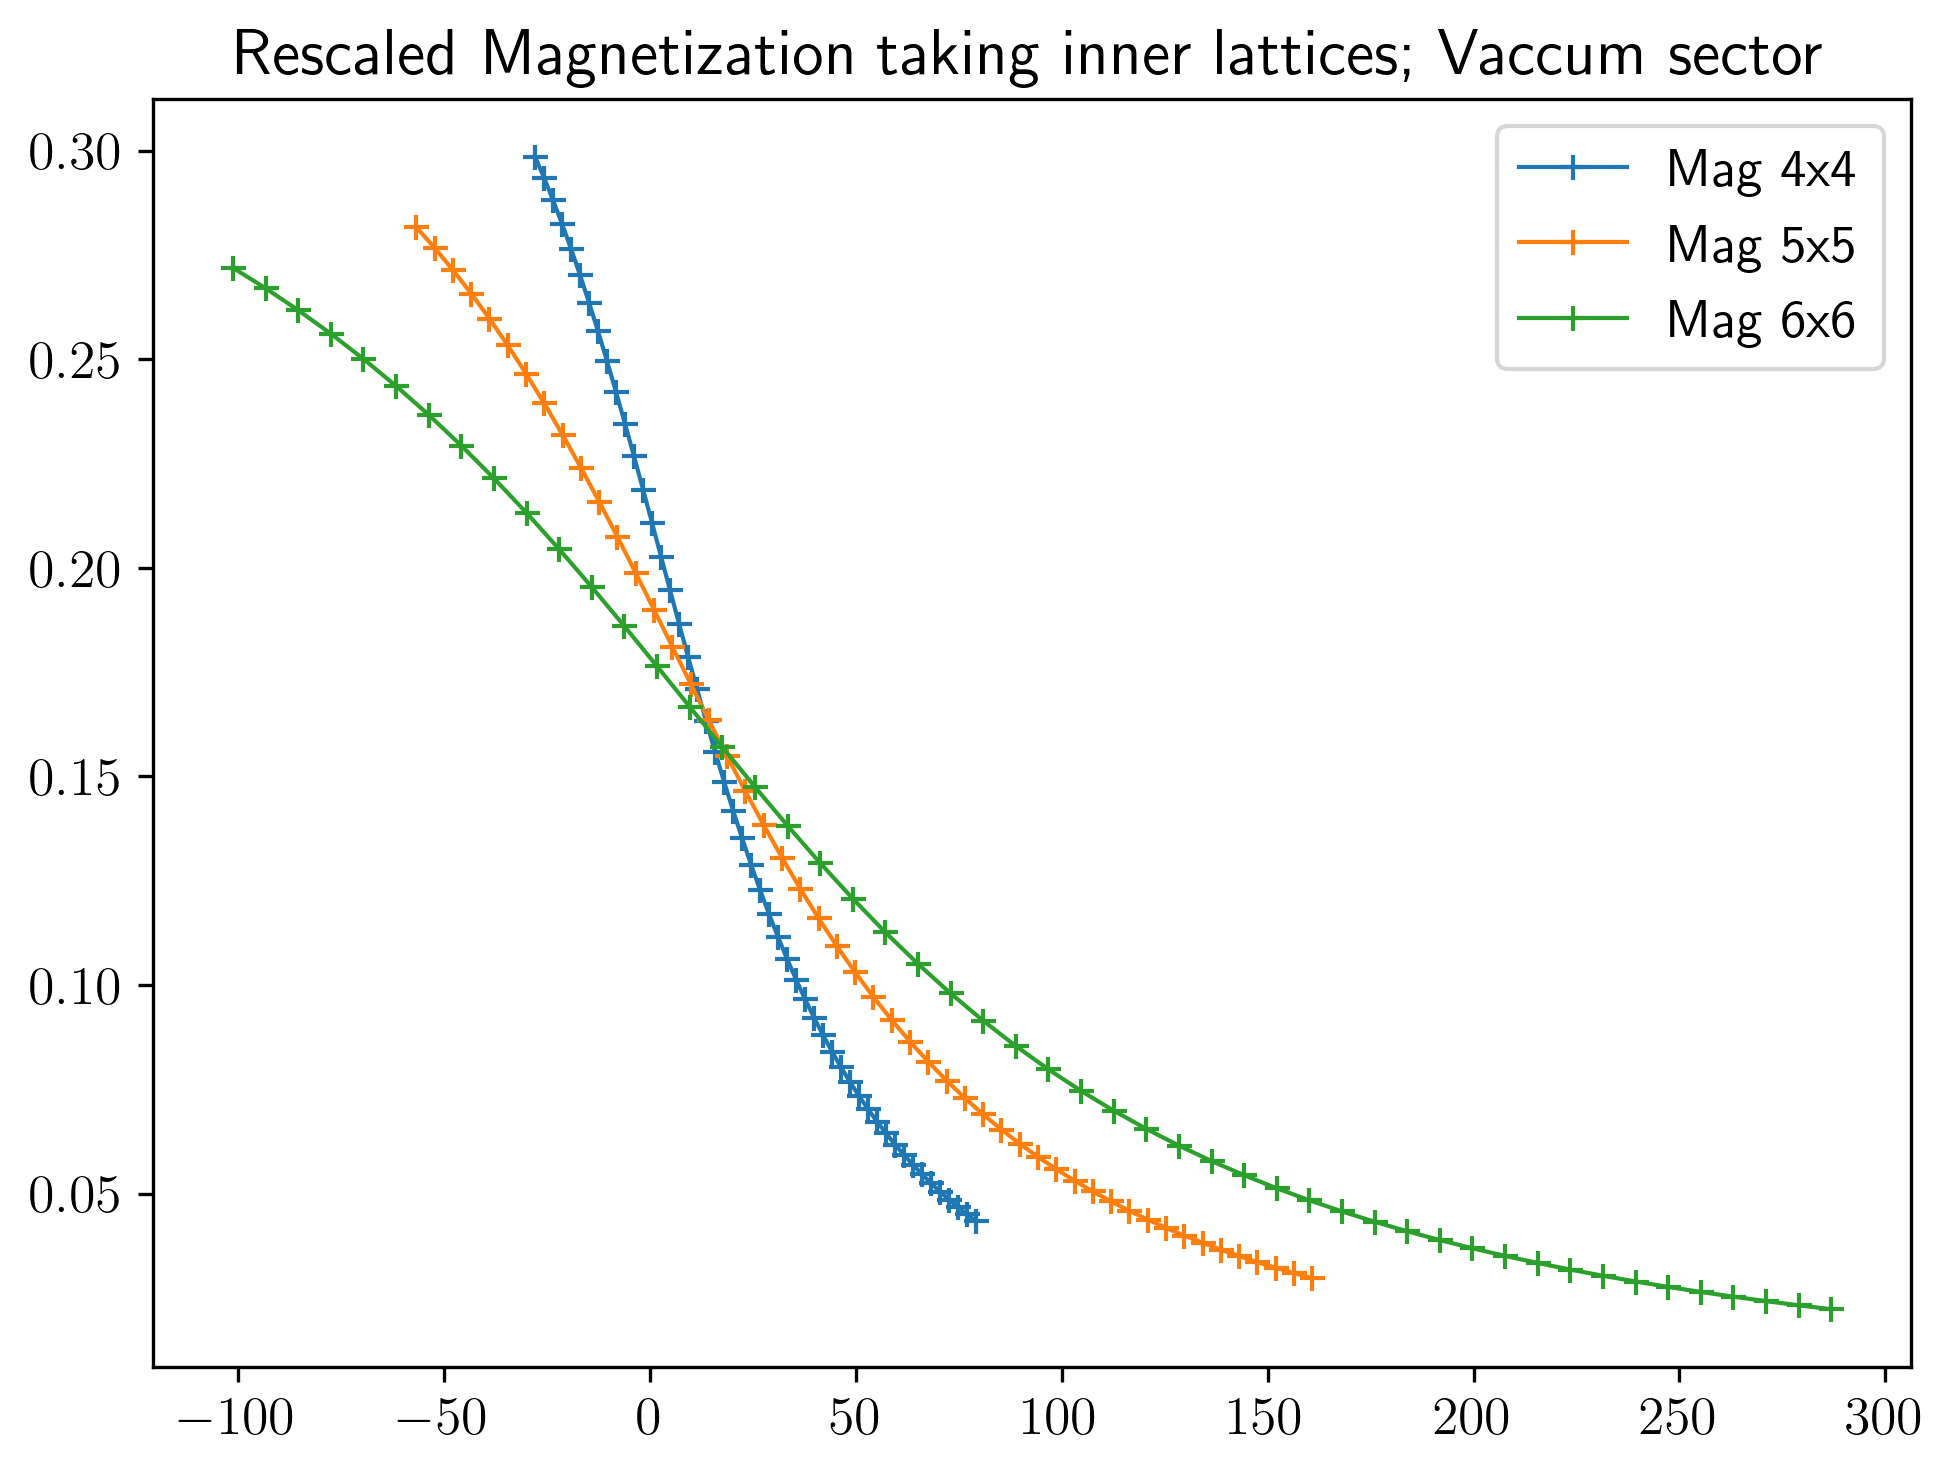

In [43]:
Ls = [4,5,6]
chis = [64,128,256]
plt.title("Rescaled Magnetization taking inner lattices; Vaccum sector")
hs = np.linspace(2,6,50)
hc = 3.044
nu = 0.629971
beta = 0.326419
max_vals = []
for L, chi in zip(Ls, chis):
    string = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")/(L*L-((L-2)*(L-2)))
    plt.plot(((hs-hc)/hc)*((L*L)**(1/nu)), ((L*L)**(beta/nu))*string, '+-', linewidth=1, label=f"Mag {L}x{L}")


# plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

In [19]:
-(beta-1)/nu

1.0692254087886586

### Wilson Loops

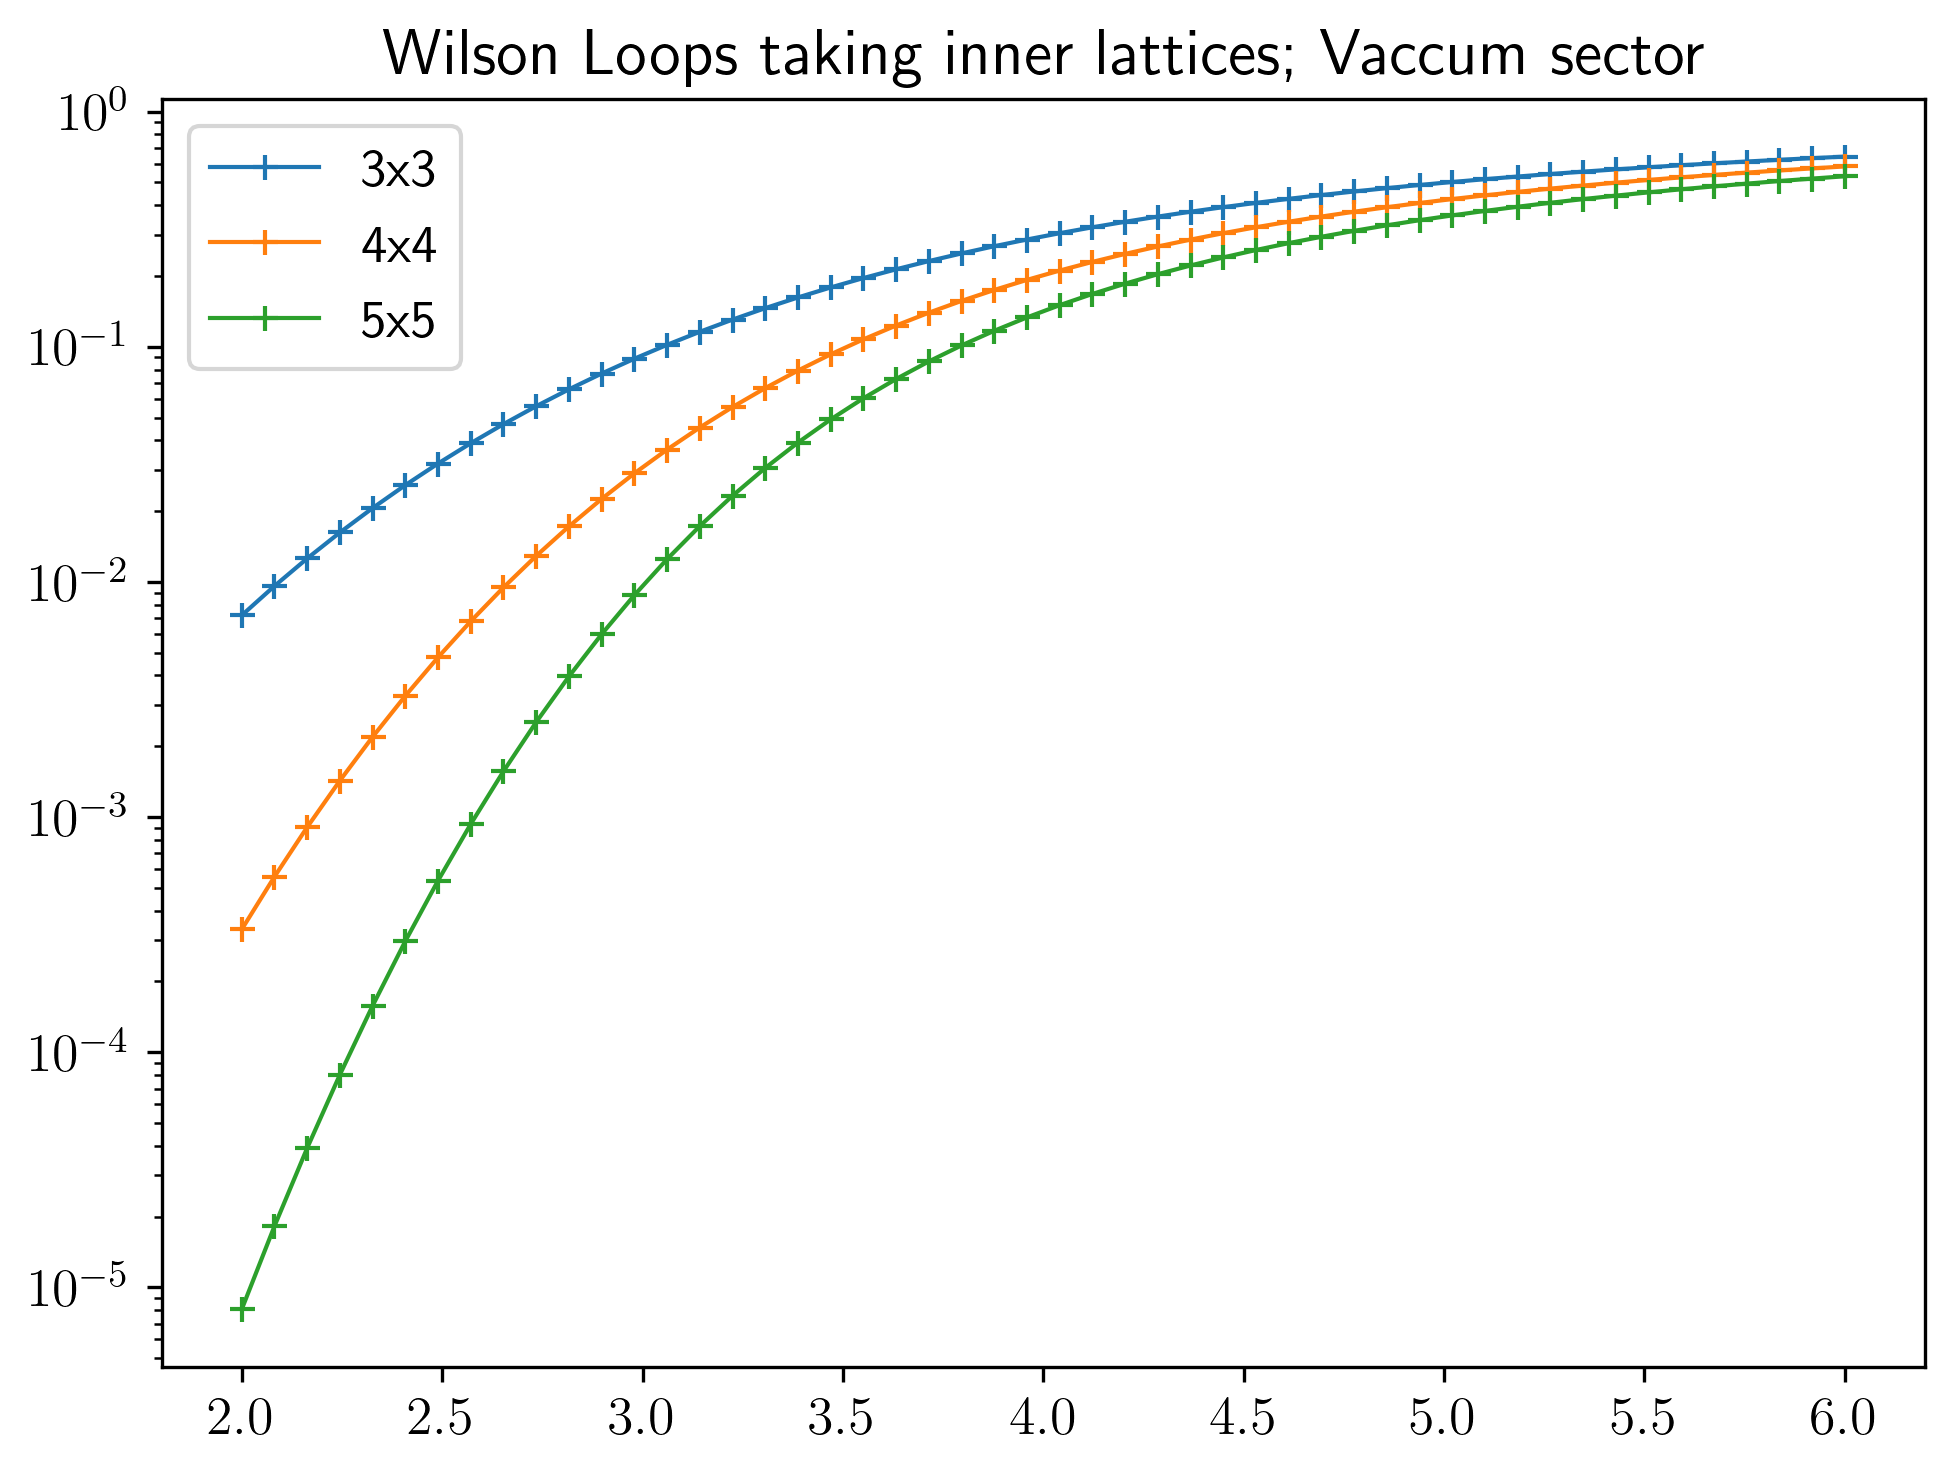

In [31]:
Ls = [3,4,5]
chis = [8,64,128]
plt.title("Wilson Loops taking inner lattices; Vaccum sector")
hs = np.linspace(2,6,50)
area_vals = []
perim_vals = []
for L, chi in zip(Ls, chis):
    string2 = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/wilson_loops/wilson_loop_second_moment_Z2_dual_direct_lattice_{L}x{L}_h_2.0-6.0_delta_50_chi_{chi}.npy")
    string = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/wilson_loops/wilson_loop_first_moment_Z2_dual_direct_lattice_{L}x{L}_h_2.0-6.0_delta_50_chi_{chi}.npy")
    area_vals.append(string[0])
    perim_vals.append(string[-1])
    plt.plot(hs, string, '+-', linewidth=1, label=f"{L}x{L}")

# plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.yscale('log')
plt.legend()
plt.show()

In [32]:
def area_law(L,a,b):
    return b*np.exp(-(L*L)*a)

def perim_law(L,a,b):
    return b*np.exp(-(L)*a)

x_data = [4,5,6]
y_data = area_vals
popt, copt = curve_fit(area_law, x_data, y_data)
print("Area")
print(popt)

y_data = perim_vals
popt, copt = curve_fit(perim_law, x_data, y_data)
print("Perimeter")
print(popt)

Area
[0.34167298 1.70616972]
Perimeter
[0.09627039 0.94577904]


/var/folders/32/fk_0xqj113d4fp2cxfpqtfd40000gr/T/ipykernel_9588/3599307713.py:2: RuntimeWarning: overflow encountered in exp
  return b*np.exp(-(L*L)*a)


### Binder's Cumulant $U_c$

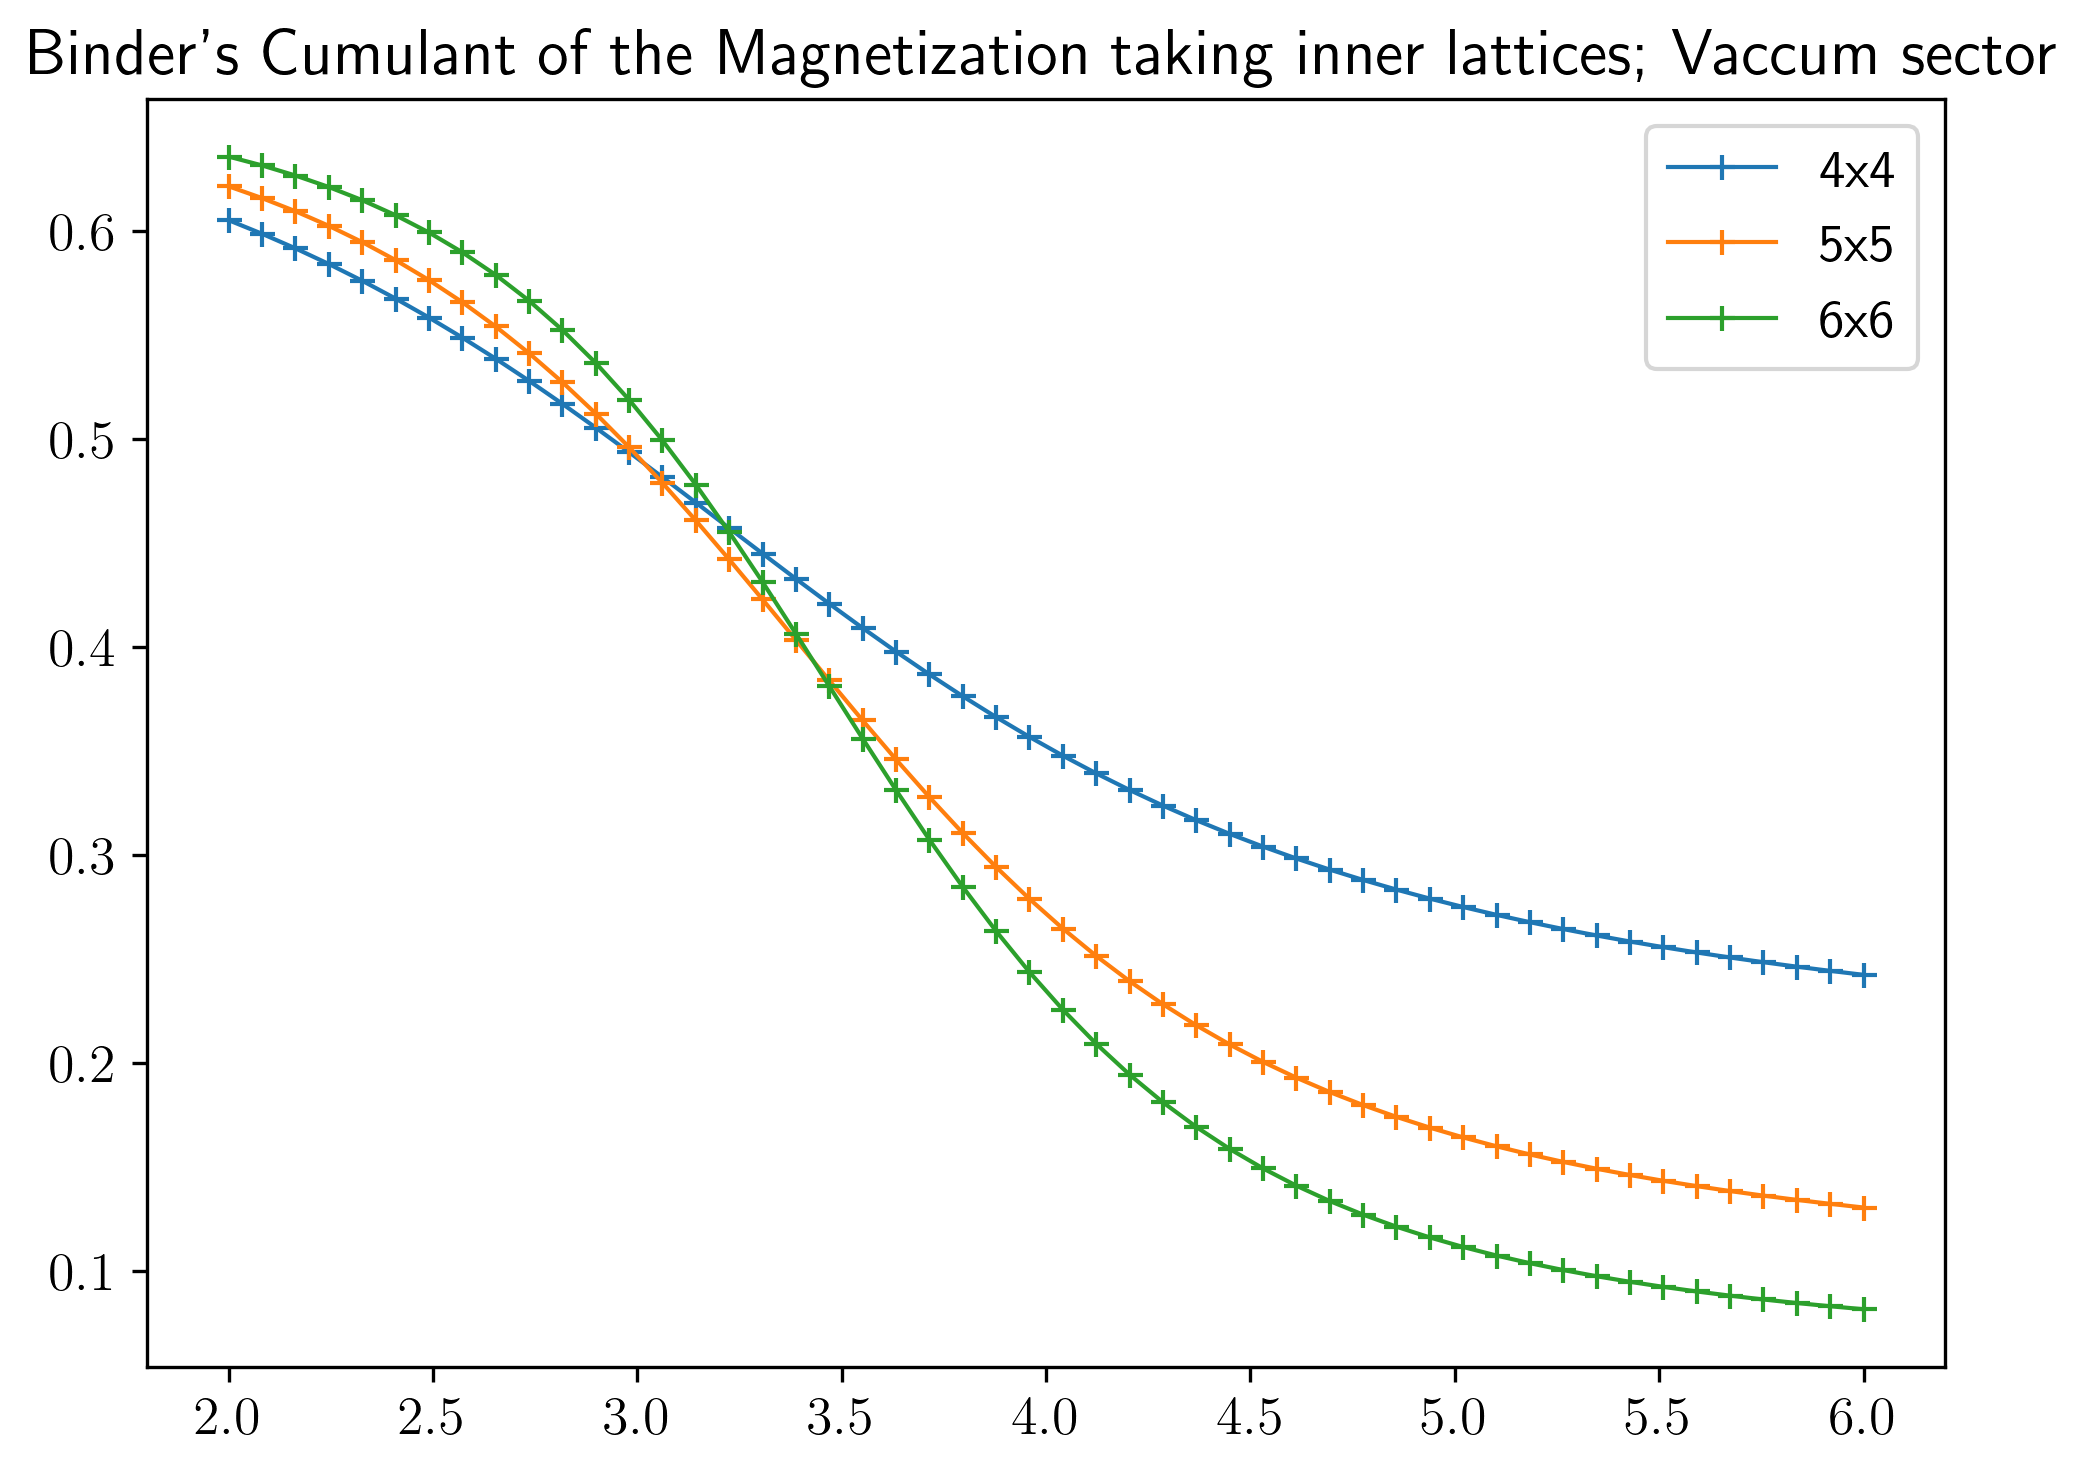

In [26]:
Ls = [4,5,6]
chis = [64,128,256]
plt.title("Binder's Cumulant of the Magnetization taking inner lattices; Vaccum sector")
hs = np.linspace(2,6,50)
max_vals = []
for L, chi in zip(Ls, chis):
    string2 = np.load(f"G:/My Drive/projects/1_Z2/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
    string4 = np.load(f"G:/My Drive/projects/1_Z2/results/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
    uc = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, uc, '+-', linewidth=1, label=f"{L}x{L}")

# plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

In [126]:
Ls = [4,5,6]
chis = [64,128,256]
h_i = 2
h_f = 6
npoints = 50
path_drive = "/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results"
hs = np.linspace(h_i, h_f, npoints)
max_reps = 10
acc = 1e-5
Uc = []
Hc = []
for L, chi in zip(Ls, chis):
    Uc.append(np.load(f"{path_drive}/critical_exponents/binders_cumulant_dual_mag_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy"))

for i in range(len(Ls)-1):
    print(f"finding h_c for L1={Ls[i]}, L2={Ls[i+1]}")
    for idx, h in enumerate(hs):
        if Uc[i][idx] > Uc[i+1][idx]:
            print("hc interval found!")
            break
    h_plus = h
    h_minus = hs[idx-1]
    hc = 0

    for rep in range(max_reps):
        h_mean = np.mean([h_minus,h_plus])
        u1 = np.interp(h_mean, hs[idx-2:idx+1], Uc[i][idx-2:idx+1])
        u2 = np.interp(h_mean, hs[idx-2:idx+1], Uc[i+1][idx-2:idx+1])
        if u1 < u2:
            h_minus = h_mean
        if u1 > u2:
            h_plus = h_mean
        
        if abs(u1-u2) < acc:
            hc = h_mean
            print(f"we found a h_c: {hc} with accuracy: {acc} after {rep} repetitions")
            break
        if rep == (max_reps-1) and (hc == 0):
            hc = h_mean
            print(f"we found a h_c: {hc} with accuracy: {abs(u1-u2)} after {rep} repetitions - increase reps or reduce accuracy")
    Hc.append(hc)

hc_mean = np.mean(Hc)
print(f"we found a h_c among all the Ls equal to: {hc_mean}")

finding h_c for L1=4, L2=5
hc interval found!
we found a h_c: 3.017538265306122 with accuracy: 1e-05 after 7 repetitions
finding h_c for L1=5, L2=6
hc interval found!
we found a h_c: 3.4301658163265305 with accuracy: 1e-05 after 7 repetitions
we found a h_c among all the Ls equal to: 3.2238520408163263


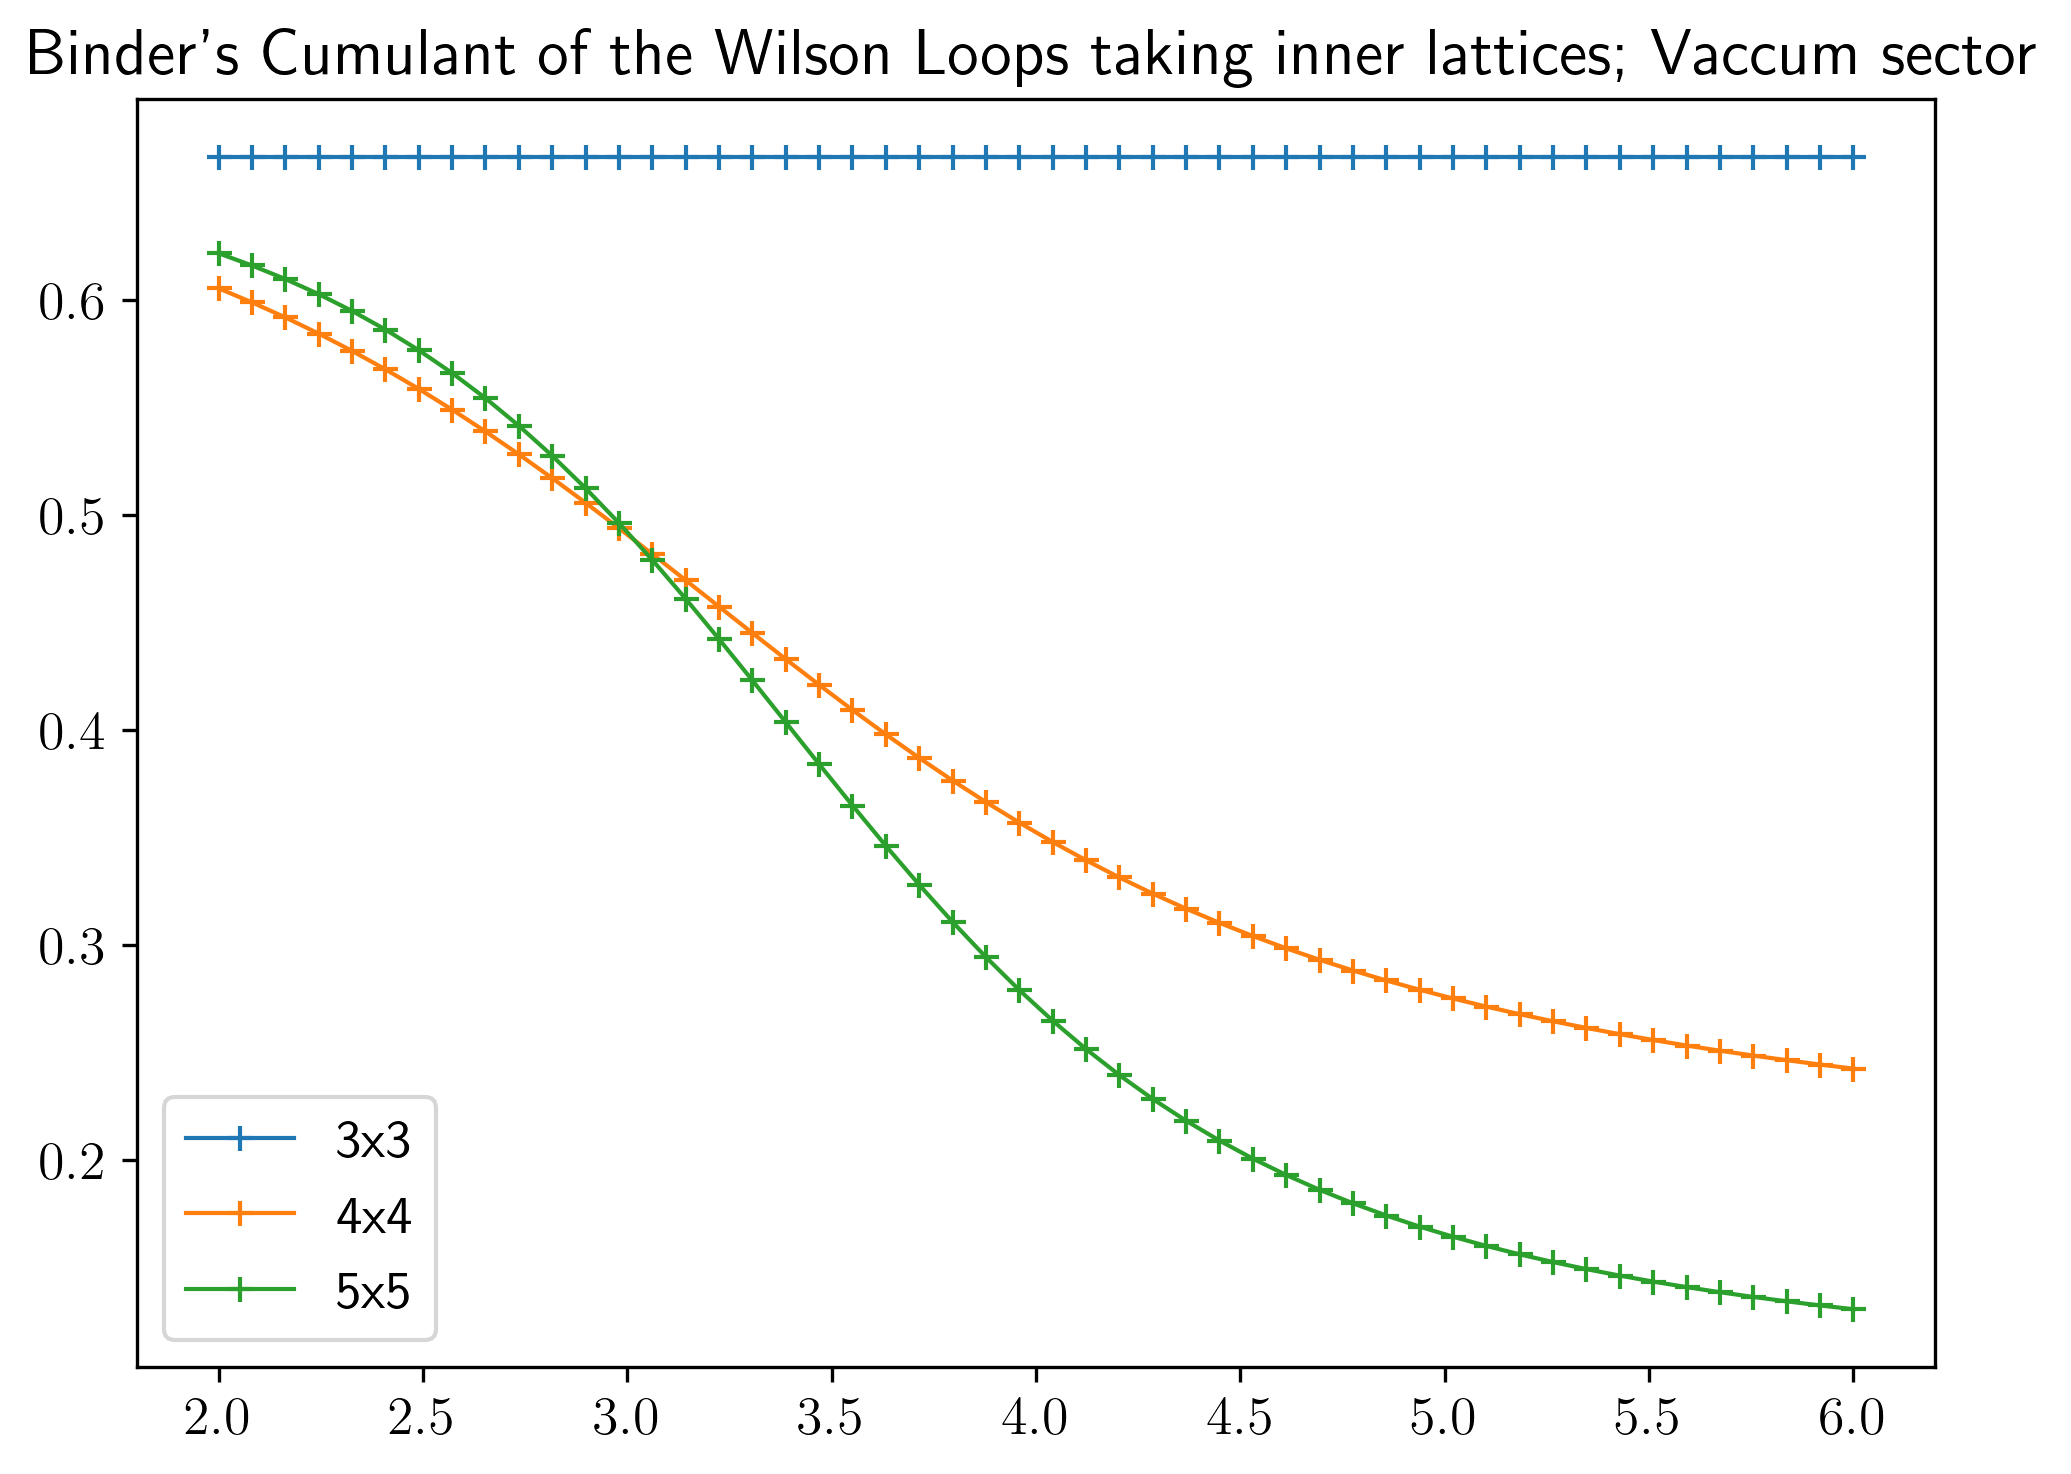

In [26]:
Ls = [3,4,5]
chis = [8,64,128]
plt.title("Binder's Cumulant of the Wilson Loops taking inner lattices; Vaccum sector")
hs = np.linspace(2,6,50)
max_vals = []
for L, chi in zip(Ls, chis):
    string2 = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/wilson_loops/wilson_loop_second_moment_Z2_dual_direct_lattice_{L}x{L}_h_2.0-6.0_delta_50_chi_{chi}.npy")
    string4 = np.load(f"/Users/fradm98/Google Drive/My Drive/projects/1_Z2/results/wilson_loops/wilson_loop_fourth_moment_Z2_dual_direct_lattice_{L}x{L}_h_2.0-6.0_delta_50_chi_{chi}.npy")
    uc = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, uc, '+-', linewidth=1, label=f"{L}x{L}")

# plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()